<a href="https://colab.research.google.com/github/guufelipe/Desafio-Dados-CITI/blob/main/Entrega-tratamento-analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho PTA

# Tratamento de dados

## Importando bibliotecas

In [ ]:
# Importando pandas
import pandas as pd

In [ ]:
# Importando numpy
import numpy as np

In [ ]:
# Importando re
import re

In [ ]:
#importando contador
from collections import Counter

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns



-Instalando e Importando a biblioteca fuzzywuzzy -> serve para a função de similaridade


In [ ]:
pip install fuzzywuzzy python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 20.4 MB/s eta 0:00:00


In [ ]:
from fuzzywuzzy import process, fuzz

## Importando as Bases de Dados

In [ ]:
# Importando uma base de dados existente com pandas
planilha1 = pd.read_csv('/content/drive/MyDrive/Bases/stock_part1.csv')
planilha2 = pd.read_csv('/content/drive/MyDrive/Bases/stock_part2.csv')

In [ ]:
planilha1 #exibindo planilha 1

,ID,Date,Ticker,Open,High,Low,Close,Adj Close,Volume,Dividend,Split Ratio
0,1,2023-09-03,meta,258.44,909.63,1380.05,"595,86",61.54,"8,846,040,350",3.57,1:1
1,2,"Aug 28, 2024",NVDA,678.96,725.03,185.51,295.83,843.78,7346935699,2.85,3:2
2,3,"May 10, 2022",INTU,1348.94,215.00,831.86,874.05,"$336,19","8,027,589,419",2.28,2:1
3,4,2017-12-26,NVDA,$186.39,1111.85,508.65,511.49,$952.63,1939.5M,4.51,3:2
4,5,"Jan 20, 2022",WORK,1425.94,692.20,340.75,$378.58,1493.44,8984007687,1.93,NaN
...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,"Jul 27, 2019",TSLA,"269,17",144.45,"418,85",588.19,$893.89,4184.54M,"4,71",3:2
199996,199997,"Sep 13, 2021",VMW,315.78,262.78,"89,13","$172,09",659.42,"5,782,458,138",1.04,3:2
199997,199998,2016-08-19,aapl,327.66,897.77,"1402,05",140.90,904.11,3104296586,$3.21,NaN
199998,199999,2020-06-24,DJCU,141.99,739.41,285.76,$529.92,1201.64,45454067,1.51,NaN


In [ ]:
planilha2 #exibindo planilha 2

,ID,Sector,Industry,Exchange,Currency,MarketCap,PE Ratio,EPS,Next Earnings,Previous Close,Day Range
0,1,TELECOM,Chemicals,NYSE,USD,"370,815,220,190",27.40,16.68,"May 19, 2025",567.57,X095.58-898.36
1,2,Real Estate,Property Mgmt,TSE,$,1289775810656,90.13,"0,57",06-23-2025,$185.1Z,907.52-552.85
2,3,healthcare,Biotech,LSE,$,97815908000,$15.67,18.17,07-21-2025,823.07,1380.78-1361.69
3,4,Telecom,Electric Power,HKEX,$,1658573090566,83.90,-4.82,23/07/2025,179.88,457.99-138.11
4,5,retail,Banking,NASDAQ,US DOLLAR,315341356874,79.86,5.67,08/06/2025,$1004.79,644.16-920.32
...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,Telecom,Oil & Gas,Euronext,USD,1896704951586,94.38,15.10,2025-05-22,749.55,1486.17-538.54
199996,199997,Real Estate,BiotecG,TSE,$,319027664163,61.69,"2,69",06-14-2025,376.85,1275.46-1239.11
199997,199998,Real Estate,Wireless Telecom,TSX,USD,822395576541,30.42,"3,75","Jul 14, 2025",1084.33,1479.14-565.90
199998,199999,technology,Chemicals,Euronext,$,134796316185,63.49,19.86,"Aug 04, 2025",595.77,1317.70-646.91


## Juntando as Bases de Dados

In [ ]:
# Juntar arquivos em um só com base em um elemento comum
nova_planilha = pd.merge(planilha1, planilha2, on='ID', how='inner')

In [ ]:
nova_planilha #Exibindo nova planilha

,ID,Date,Ticker,Open,High,Low,Close,Adj Close,Volume,Dividend,...,Sector,Industry,Exchange,Currency,MarketCap,PE Ratio,EPS,Next Earnings,Previous Close,Day Range
0,1,2023-09-03,meta,258.44,909.63,1380.05,"595,86",61.54,"8,846,040,350",3.57,...,TELECOM,Chemicals,NYSE,USD,"370,815,220,190",27.40,16.68,"May 19, 2025",567.57,X095.58-898.36
1,2,"Aug 28, 2024",NVDA,678.96,725.03,185.51,295.83,843.78,7346935699,2.85,...,Real Estate,Property Mgmt,TSE,$,1289775810656,90.13,"0,57",06-23-2025,$185.1Z,907.52-552.85
2,3,"May 10, 2022",INTU,1348.94,215.00,831.86,874.05,"$336,19","8,027,589,419",2.28,...,healthcare,Biotech,LSE,$,97815908000,$15.67,18.17,07-21-2025,823.07,1380.78-1361.69
3,4,2017-12-26,NVDA,$186.39,1111.85,508.65,511.49,$952.63,1939.5M,4.51,...,Telecom,Electric Power,HKEX,$,1658573090566,83.90,-4.82,23/07/2025,179.88,457.99-138.11
4,5,"Jan 20, 2022",WORK,1425.94,692.20,340.75,$378.58,1493.44,8984007687,1.93,...,retail,Banking,NASDAQ,US DOLLAR,315341356874,79.86,5.67,08/06/2025,$1004.79,644.16-920.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,"Jul 27, 2019",TSLA,"269,17",144.45,"418,85",588.19,$893.89,4184.54M,"4,71",...,Telecom,Oil & Gas,Euronext,USD,1896704951586,94.38,15.10,2025-05-22,749.55,1486.17-538.54
199996,199997,"Sep 13, 2021",VMW,315.78,262.78,"89,13","$172,09",659.42,"5,782,458,138",1.04,...,Real Estate,BiotecG,TSE,$,319027664163,61.69,"2,69",06-14-2025,376.85,1275.46-1239.11
199997,199998,2016-08-19,aapl,327.66,897.77,"1402,05",140.90,904.11,3104296586,$3.21,...,Real Estate,Wireless Telecom,TSX,USD,822395576541,30.42,"3,75","Jul 14, 2025",1084.33,1479.14-565.90
199998,199999,2020-06-24,DJCU,141.99,739.41,285.76,$529.92,1201.64,45454067,1.51,...,technology,Chemicals,Euronext,$,134796316185,63.49,19.86,"Aug 04, 2025",595.77,1317.70-646.91


In [ ]:
nova_planilha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID              200000 non-null  int64 
 1   Date            200000 non-null  object
 2   Ticker          200000 non-null  object
 3   Open            200000 non-null  object
 4   High            200000 non-null  object
 5   Low             200000 non-null  object
 6   Close           200000 non-null  object
 7   Adj Close       200000 non-null  object
 8   Volume          200000 non-null  object
 9   Dividend        200000 non-null  object
 10  Split Ratio     161520 non-null  object
 11  Sector          200000 non-null  object
 12  Industry        200000 non-null  object
 13  Exchange        200000 non-null  object
 14  Currency        200000 non-null  object
 15  MarketCap       200000 non-null  object
 16  PE Ratio        200000 non-null  object
 17  EPS             200000 non-nu

## Tratando os Dados

## • Coluna Volume

In [ ]:
# 1. Converter para string e remover vírgulas e espaços em branco
nova_planilha['Volume'] = nova_planilha['Volume'].astype(str).str.replace(',', '', regex=False).str.strip()

# 2. Identificar as unidades (M, K, B, etc.) antes de removê-las
mask_milhoes = nova_planilha['Volume'].str.endswith('M', na=False) | nova_planilha['Volume'].str.endswith('Mb', na=False) | nova_planilha['Volume'].str.endswith('MK', na=False)
mask_milhares = nova_planilha['Volume'].str.endswith('K', na=False)
mask_bilhoes = nova_planilha['Volume'].str.endswith('B', na=False) | nova_planilha['Volume'].str.endswith('b', na=False) | nova_planilha['Volume'].str.endswith('Billion', na=False)

# 3. Remover as letras das unidades
nova_planilha['Volume'] = nova_planilha['Volume'].str.replace('Mb', '', regex=False)
nova_planilha['Volume'] = nova_planilha['Volume'].str.replace('MK', '', regex=False)
nova_planilha['Volume'] = nova_planilha['Volume'].str.replace('M', '', regex=False) # Remover 'M' depois de Mb e MK
nova_planilha['Volume'] = nova_planilha['Volume'].str.replace('K', '', regex=False)
nova_planilha['Volume'] = nova_planilha['Volume'].str.replace('Billion', '', regex=False)
nova_planilha['Volume'] = nova_planilha['Volume'].str.replace('B', '', regex=False) # Remover 'B' depois de Billion
nova_planilha['Volume'] = nova_planilha['Volume'].str.replace('b', '', regex=False) # Remover 'b' depois de Billion

# 4. Converter a coluna 'Volume' para um tipo numérico, tratando erros
nova_planilha['Volume'] = pd.to_numeric(nova_planilha['Volume'], errors='coerce')

# 5. Multiplicar pelos fatores das unidades originais, apenas para valores numéricos válidos
condicao_milhoes = mask_milhoes & nova_planilha['Volume'].notnull()
condicao_milhares = mask_milhares & nova_planilha['Volume'].notnull()
condicao_bilhoes = mask_bilhoes & nova_planilha['Volume'].notnull()

nova_planilha.loc[condicao_milhoes, 'Volume'] = nova_planilha.loc[condicao_milhoes, 'Volume'] * 1_000_000
nova_planilha.loc[condicao_milhares, 'Volume'] = nova_planilha.loc[condicao_milhares, 'Volume'] * 1_000
nova_planilha.loc[condicao_bilhoes, 'Volume'] = nova_planilha.loc[condicao_bilhoes, 'Volume'] * 1_000_000_000

# 6. Exibir os números sem abreviações e sem casas decimais
pd.options.display.float_format = '{:.0f}'.format

# 7. Verificação de valores inválidos (NaN)
print("\nValores inválidos (NaN) na coluna Volume:", nova_planilha['Volume'].isnull().sum())

# 8. Visualização da coluna após padronização
print("\nDataFrame Após Padronização da Coluna Volume:")
print(nova_planilha[['Volume']].head())


Valores inválidos (NaN) na coluna Volume: 0

DataFrame Após Padronização da Coluna Volume:
      Volume
0 8846040350
1 7346935699
2 8027589419
3 1939500000
4 8984007687


In [ ]:
# Salvar a coluna 'Volume' em uma variável temporária antes de aplicar as transformações
volume_original = nova_planilha['Volume']

## • Coluna MarketCap

In [ ]:
# 1. Converter para string e remover vírgulas e espaços em branco
nova_planilha['MarketCap'] = nova_planilha['MarketCap'].astype(str).str.replace(',', '', regex=False).str.strip()

# 2. Identificar as unidades (M, K, B, etc.) antes de removê-las
mask_milhoes = nova_planilha['MarketCap'].str.endswith('M', na=False) | nova_planilha['MarketCap'].str.endswith('m', na=False) | nova_planilha['MarketCap'].str.endswith('Mb', na=False) | nova_planilha['MarketCap'].str.endswith('MK', na=False)
mask_milhares = nova_planilha['MarketCap'].str.endswith('K', na=False) | nova_planilha['MarketCap'].str.endswith('k', na=False)
mask_bilhoes = nova_planilha['MarketCap'].str.endswith('B', na=False) | nova_planilha['MarketCap'].str.endswith('b', na=False) | nova_planilha['MarketCap'].str.endswith('Billion', na=False)

# 3. Remover as letras das unidades
nova_planilha['MarketCap'] = nova_planilha['MarketCap'].str.replace('Mb', '', regex=False)
nova_planilha['MarketCap'] = nova_planilha['MarketCap'].str.replace('MK', '', regex=False)
nova_planilha['MarketCap'] = nova_planilha['MarketCap'].str.replace('m', '', regex=False)
nova_planilha['MarketCap'] = nova_planilha['MarketCap'].str.replace('M', '', regex=False) # Remover 'M' depois de Mb e MK
nova_planilha['MarketCap'] = nova_planilha['MarketCap'].str.replace('k', '', regex=False)
nova_planilha['MarketCap'] = nova_planilha['MarketCap'].str.replace('K', '', regex=False)
nova_planilha['MarketCap'] = nova_planilha['MarketCap'].str.replace('Billion', '', regex=False)
nova_planilha['MarketCap'] = nova_planilha['MarketCap'].str.replace('B', '', regex=False) # Remover 'B' depois de Billion
nova_planilha['MarketCap'] = nova_planilha['MarketCap'].str.replace('b', '', regex=False) # Remover 'b' depois de Billion

# 4. Converter a coluna 'MarketCap' para um tipo numérico, tratando erros
nova_planilha['MarketCap'] = pd.to_numeric(nova_planilha['MarketCap'], errors='coerce')

# 5. Multiplicar pelos fatores das unidades originais, apenas para valores numéricos válidos
condicao_milhoes = mask_milhoes & nova_planilha['MarketCap'].notnull()
condicao_milhares = mask_milhares & nova_planilha['MarketCap'].notnull()
condicao_bilhoes = mask_bilhoes & nova_planilha['MarketCap'].notnull()

nova_planilha.loc[condicao_milhoes, 'MarketCap'] = nova_planilha.loc[condicao_milhoes, 'MarketCap'] * 1_000_000
nova_planilha.loc[condicao_milhares, 'MarketCap'] = nova_planilha.loc[condicao_milhares, 'MarketCap'] * 1_000
nova_planilha.loc[condicao_bilhoes, 'MarketCap'] = nova_planilha.loc[condicao_bilhoes, 'MarketCap'] * 1_000_000_000

# 6. Exibir os números sem abreviações e sem casas decimais
pd.options.display.float_format = '{:.0f}'.format

# 7. Verificação de valores inválidos (NaN)
print("\nValores inválidos (NaN) na coluna MarketCap:", nova_planilha['MarketCap'].isnull().sum())

# 8. Visualização da coluna após padronização
print("\nDataFrame Após Padronização da Coluna MarketCap:")
print(nova_planilha[['MarketCap']].head())


Valores inválidos (NaN) na coluna MarketCap: 0

DataFrame Após Padronização da Coluna MarketCap:
      MarketCap
0  370815220190
1 1289775810656
2   97815908000
3 1658573090566
4  315341356874


In [ ]:
# Salvar a coluna 'MarketCap' em uma variável temporária antes de aplicar as transformações
MarketCap_original = nova_planilha['MarketCap']

## Aplicar a todos os dados

In [ ]:
cliente = nova_planilha.loc[nova_planilha['ID'] == 136]



*   Padronizando tudo em letra minúscula



In [ ]:
nova_planilha = nova_planilha.applymap(lambda x: x.lower() if isinstance(x, str) else x)

<ipython-input-20-0d157a7dddc4>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  nova_planilha = nova_planilha.applymap(lambda x: x.lower() if isinstance(x, str) else x)




*  Remove caracteres especiais



In [ ]:
def remover_caracteres_especiais(x):
    if isinstance(x, str):
        return re.sub(r'[^a-zA-Z0-9\s]', '', x)
    return x



*  Substitui virgulas por pontos



In [ ]:
nova_planilha = nova_planilha.applymap(lambda x: str(x).replace(',', '.') if pd.notnull(x) else x) #substituindo todos os pontos por virgula
#applymap() aplica a função a cada célula do DataFrame.

<ipython-input-22-94277b40cb76>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  nova_planilha = nova_planilha.applymap(lambda x: str(x).replace(',', '.') if pd.notnull(x) else x) #substituindo todos os pontos por virgula


In [ ]:
# Restaura a coluna 'Volume' original (numérica)
nova_planilha['Volume'] = volume_original

# Confirmar se ficou numérica (float64)
print("\nTipo de dados da coluna Volume:", nova_planilha['Volume'].dtype)



# Restaura a coluna 'MarketCap' original (numérica)
nova_planilha['MarketCap'] = MarketCap_original

# Confirmar se ficou numérica (float64)
print("\nTipo de dados da coluna MarketCap:", nova_planilha['MarketCap'].dtype)


Tipo de dados da coluna Volume: float64

Tipo de dados da coluna MarketCap: float64


In [ ]:
nova_planilha

,ID,Date,Ticker,Open,High,Low,Close,Adj Close,Volume,Dividend,...,Sector,Industry,Exchange,Currency,MarketCap,PE Ratio,EPS,Next Earnings,Previous Close,Day Range
0,1,2023-09-03,meta,258.44,909.63,1380.05,595.86,61.54,8846040350,3.57,...,telecom,chemicals,nyse,usd,370815220190,27.40,16.68,may 19. 2025,567.57,x095.58-898.36
1,2,aug 28. 2024,nvda,678.96,725.03,185.51,295.83,843.78,7346935699,2.85,...,real estate,property mgmt,tse,$,1289775810656,90.13,0.57,06-23-2025,$185.1z,907.52-552.85
2,3,may 10. 2022,intu,1348.94,215.00,831.86,874.05,$336.19,8027589419,2.28,...,healthcare,biotech,lse,$,97815908000,$15.67,18.17,07-21-2025,823.07,1380.78-1361.69
3,4,2017-12-26,nvda,$186.39,1111.85,508.65,511.49,$952.63,1939500000,4.51,...,telecom,electric power,hkex,$,1658573090566,83.90,-4.82,23/07/2025,179.88,457.99-138.11
4,5,jan 20. 2022,work,1425.94,692.20,340.75,$378.58,1493.44,8984007687,1.93,...,retail,banking,nasdaq,us dollar,315341356874,79.86,5.67,08/06/2025,$1004.79,644.16-920.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,jul 27. 2019,tsla,269.17,144.45,418.85,588.19,$893.89,4184540000,4.71,...,telecom,oil & gas,euronext,usd,1896704951586,94.38,15.10,2025-05-22,749.55,1486.17-538.54
199996,199997,sep 13. 2021,vmw,315.78,262.78,89.13,$172.09,659.42,5782458138,1.04,...,real estate,biotecg,tse,$,319027664163,61.69,2.69,06-14-2025,376.85,1275.46-1239.11
199997,199998,2016-08-19,aapl,327.66,897.77,1402.05,140.90,904.11,3104296586,$3.21,...,real estate,wireless telecom,tsx,usd,822395576541,30.42,3.75,jul 14. 2025,1084.33,1479.14-565.90
199998,199999,2020-06-24,djcu,141.99,739.41,285.76,$529.92,1201.64,45454067,1.51,...,technology,chemicals,euronext,$,134796316185,63.49,19.86,aug 04. 2025,595.77,1317.70-646.91


Captando escritas despadronizadas

In [ ]:
for col in ['Sector', 'Industry', 'Currency']:
    print(f"\nValores únicos em {col}:")
    print(nova_planilha[col].unique())


Valores únicos em Sector:
['telecom' 'real estate' 'healthcare' ... 'consurer discretionary'
 'constmer discretionary' 'consumev discretionary']

Valores únicos em Industry:
['chemicals' 'property mgmt' 'biotech' ... 'chempcals' 'wireless telecsm'
 'wiieless telecom']

Valores únicos em Currency:
['usd' '$' 'us dollar' 'usrdollar' 'us vollar' 'ws dollar' 'rsd' 'lsd'
 'ysd' 'uid' 'asd' 'us dollgr' 'us dollvr' 'usn' 'hsd' 'us dkllar'
 'us dolltr' 'ux dollar' 'us domlar' 'uy dollar' 'us dolyar' 'us jollar'
 'us dolnar' 'uskdollar' 'isd' 'uh dollar' 'us dollat' 'us dallar' 'usg'
 'us doolar' 'usv' 'ust' 'us dollyr' 'us dollor' 'ksd' 'uk dollar'
 'us aollar' 'us dollhr' 'us dolbar' 'zsd' 'usx' 'us doular' 'msd'
 'ms dollar' 'us uollar' 'us xollar' 'usp' 'ks dollar' 'usl' 'us dolfar'
 'uod' 'uzd' 'us dolvar' 'csd' 'usb' 'us dojlar' 'psd' 'us doylar' 'uad'
 'usu' 'ys dollar' 'is dollar' 'xsd' 'us doalar' 'rs dollar' 'upd'
 'ur dollar' 'qs dollar' 'ued' 'us dollaz' 'us dollav' 'usk' 'us dylla

## • Coluna Currency

In [ ]:
def corrigir_moeda(valor):
    if pd.isna(valor):
        return valor
    valor = str(valor).strip().lower()

    # Corrigir tudo que parece ser 'usd'
    if 'us' in valor or 'dollar' in valor or valor.endswith('d') or '$' in valor:
        return 'usd'

    return valor

In [ ]:
# Aplica a função à coluna 'Currency'
nova_planilha['Currency'] = nova_planilha['Currency'].apply(corrigir_moeda)

- Testando se está tudo certo

In [ ]:
print(nova_planilha['Currency'].unique())

['usd']


In [ ]:
nova_planilha['Currency'].value_counts().head(15)

,count
Currency,
usd,200000


## • Coluna Sector

In [ ]:
nova_planilha['Sector'].value_counts().head(15)

,count
Sector,
utilities,19229
consumer discretionary,19118
energy,19102
telecom,19068
retail,19067
technology,19015
healthcare,18980
materials,18913
finance,18912


In [ ]:
nova_planilha['Sector'] = nova_planilha['Sector'].str.strip().str.lower()

In [ ]:
setores_corretos = ['telecom', 'real estate', 'healthcare', 'retail', 'consumer discretionary', 'energy', 'finance', 'utilities', 'technology', 'materials']

In [ ]:
nova_planilha['Sector'] = nova_planilha['Sector'].apply(lambda x: process.extractOne(x, setores_corretos)[0] if pd.notna(x) else x)

In [ ]:
nova_planilha['Sector'].value_counts().head(11)

,count
Sector,
utilities,20188
energy,20090
telecom,20078
consumer discretionary,20027
technology,20026
retail,20016
healthcare,19980
materials,19943
finance,19904


## • Coluna Industry

In [ ]:
nova_planilha['Industry'].value_counts().head(15)

,count
Industry,
electric power,19212
oil & gas,19198
software,19167
chemicals,19127
wireless telecom,19008
banking,18988
e-commerce,18955
property mgmt,18953
biotech,18909


In [ ]:
industrias_corretas = ['chemicals', 'property mgmt', 'biotech', 'banking', 'electric power', 'oil & gas', 'wireless telecom', 'e-commerce', 'software','apparel']

In [ ]:
nova_planilha['Industry'] = nova_planilha['Industry'].str.strip().str.lower()

In [ ]:
nova_planilha['Industry'] = nova_planilha['Industry'].apply(lambda x: process.extractOne(x, industrias_corretas)[0] if pd.notna(x) else x)

In [ ]:
nova_planilha['Industry'].value_counts().head(15)

,count
Industry,
electric power,20186
software,20180
oil & gas,20127
chemicals,20076
e-commerce,19953
wireless telecom,19940
banking,19939
property mgmt,19924
apparel,19838


- vendo se não tem mais nenhum erro nas colunas Industry e Sector

In [ ]:
print(nova_planilha['Industry'].unique())

['chemicals' 'property mgmt' 'biotech' 'electric power' 'banking'
 'apparel' 'oil & gas' 'wireless telecom' 'e-commerce' 'software']


In [ ]:
print(nova_planilha['Sector'].unique())

['telecom' 'real estate' 'healthcare' 'retail' 'finance'
 'consumer discretionary' 'utilities' 'materials' 'energy' 'technology']


## • Coluna Exchange



- checando os valores unicos



In [ ]:
nova_planilha['Exchange'].value_counts().head(15)

,count
Exchange,
hkex,21285
tsx,21277
sse,21270
euronext,21196
nyse,21176
nasdaq,21150
amex,21130
tse,21047
lse,20912




- convertando coluna para letra maiuscula



In [ ]:
nova_planilha['Exchange'] = nova_planilha['Exchange'].str.upper()

In [ ]:
nova_planilha['Exchange'].value_counts().head(15)

,count
Exchange,
HKEX,21285
TSX,21277
SSE,21270
EURONEXT,21196
NYSE,21176
NASDAQ,21150
AMEX,21130
TSE,21047
LSE,20912


In [ ]:
setores_corretos = ['HKEX', 'TSX', 'SSE', 'EURONEXT', 'NASDAQ', 'NYSE', 'TSE', 'LSE', 'AMEX']

In [ ]:
nova_planilha['Exchange'] = nova_planilha['Exchange'].apply(lambda x: process.extractOne(x, setores_corretos)[0] if pd.notna(x) else x)

In [ ]:
nova_planilha['Exchange'].value_counts().head(15)

,count
Exchange,
SSE,22908
TSX,22804
HKEX,22381
EURONEXT,22303
NYSE,22244
NASDAQ,22183
AMEX,22164
LSE,21578
TSE,21435


## • Coluna Open

In [ ]:
# Substituir vírgulas por pontos
nova_planilha['Open'] = nova_planilha['Open'].astype(str).str.replace(',', '.', regex=False)

# Remover caracter não numérico (z)
nova_planilha['Open'] = nova_planilha['Open'].str.replace('z', '', regex=False).str.strip()

# Remover caracter não numérico ($)
nova_planilha['Open'] = nova_planilha['Open'].str.replace('$', '', regex=False).str.strip()

# Converter a coluna para um tipo numérico
nova_planilha['Open'] = pd.to_numeric(nova_planilha['Open'], errors='coerce')

# Exibir os números com 2 casas decimais
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
# Quantidade de valores não convertidos (NaN)
print("Quantidade de valores (NaN):", nova_planilha['Open'].isnull().sum())

# Quantidade de valores nulos
print("Quantidade de valores nulos:", nova_planilha['Open'].isnull().sum())

Quantidade de valores (NaN): 0
Quantidade de valores nulos: 0


In [ ]:
# Exibir coluna Open
print(nova_planilha[['Open']].head())

     Open
0  258.44
1  678.96
2 1348.94
3  186.39
4 1425.94


## • Coluna High

In [ ]:
# Substituir vírgulas por pontos
nova_planilha['High'] = nova_planilha['High'].astype(str).str.replace(',', '.', regex=False)

# Remover caracter não numérico (z)
nova_planilha['High'] = nova_planilha['High'].str.replace('z', '', regex=False).str.strip()

# Remover caracter não numérico ($)
nova_planilha['High'] = nova_planilha['High'].str.replace('$', '', regex=False).str.strip()

# Converter a coluna para um tipo numérico
nova_planilha['High'] = pd.to_numeric(nova_planilha['High'], errors='coerce')

# Exibir os números com 2 casas decimais
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
# Quantidade de valores não convertidos (NaN)
print("Quantidade de valores (NaN):", nova_planilha['High'].isnull().sum())

# Quantidade de valores nulos
print("Quantidade de valores nulos:", nova_planilha['High'].isnull().sum())

Quantidade de valores (NaN): 0
Quantidade de valores nulos: 0


In [ ]:
#Exibir coluna High
print(nova_planilha[['High',]].head())

     High
0  909.63
1  725.03
2  215.00
3 1111.85
4  692.20


## • Coluna Low

In [ ]:
# Substituir vírgulas por pontos
nova_planilha['Low'] = nova_planilha['Low'].astype(str).str.replace(',', '.', regex=False)

# Remover caracter não numérico (z)
nova_planilha['Low'] = nova_planilha['Low'].str.replace('z', '', regex=False).str.strip()

# Remover caracter não numérico ($)
nova_planilha['Low'] = nova_planilha['Low'].str.replace('$', '', regex=False).str.strip()

# Converter a coluna para um tipo numérico
nova_planilha['Low'] = pd.to_numeric(nova_planilha['Low'], errors='coerce')

# Exibir os números com 2 casas decimais
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
# Quantidade de valores não convertidos (NaN)
print("Quantidade de valores (NaN):", nova_planilha['Low'].isnull().sum())

# Quantidade de valores nulos
print("Quantidade de valores nulos:", nova_planilha['Low'].isnull().sum())

Quantidade de valores (NaN): 0
Quantidade de valores nulos: 0


In [ ]:
#Exibir coluna Low
print(nova_planilha[['Low',]].head())

      Low
0 1380.05
1  185.51
2  831.86
3  508.65
4  340.75


## • Coluna Close

In [ ]:
# Substituir vírgulas por pontos
nova_planilha['Close'] = nova_planilha['Close'].astype(str).str.replace(',', '.', regex=False)

# Remover caracter não numérico (z)
nova_planilha['Close'] = nova_planilha['Close'].str.replace('z', '', regex=False).str.strip()

# Remover caracter não numérico ($)
nova_planilha['Close'] = nova_planilha['Close'].str.replace('$', '', regex=False).str.strip()

# Converter a coluna para um tipo numérico
nova_planilha['Close'] = pd.to_numeric(nova_planilha['Close'], errors='coerce')

# Exibir os números com 2 casas decimais
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
# Quantidade de valores não convertidos (NaN)
print("Quantidade de valores (NaN):", nova_planilha['Close'].isnull().sum())

# Quantidade de valores nulos
print("Quantidade de valores nulos:", nova_planilha['Close'].isnull().sum())

Quantidade de valores (NaN): 0
Quantidade de valores nulos: 0


In [ ]:
#Exibir coluna Close
print(nova_planilha[['Close',]].head())

   Close
0 595.86
1 295.83
2 874.05
3 511.49
4 378.58


## • Coluna Adj Close

In [ ]:
# Substituir vírgulas por pontos
nova_planilha['Adj Close'] = nova_planilha['Adj Close'].astype(str).str.replace(',', '.', regex=False)

# Remover caracter não numérico (z)
nova_planilha['Adj Close'] = nova_planilha['Adj Close'].str.replace('z', '', regex=False).str.strip()

# Remover caracter não numérico ($)
nova_planilha['Adj Close'] = nova_planilha['Adj Close'].str.replace('$', '', regex=False).str.strip()

# Converter a coluna para um tipo numérico
nova_planilha['Adj Close'] = pd.to_numeric(nova_planilha['Adj Close'], errors='coerce')

# Exibir os números com 2 casas decimais
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
# Quantidade de valores não convertidos (NaN)
print("Quantidade de valores (NaN):", nova_planilha['Adj Close'].isnull().sum())

# Quantidade de valores nulos
print("Quantidade de valores nulos:", nova_planilha['Adj Close'].isnull().sum())

Quantidade de valores (NaN): 0
Quantidade de valores nulos: 0


In [ ]:
#Exibir coluna Close
print(nova_planilha[['Adj Close',]].head())

   Adj Close
0      61.54
1     843.78
2     336.19
3     952.63
4    1493.44


## • Coluna Day Range



- calculando o minimo e max da planilha tendo em vista que o day range é a subtração de ambos



In [ ]:
def corrigir_day_range(row):
    try:
        minimo = min(row['High'], row['Low'])
        maximo = max(row['High'], row['Low'])
        return f"{minimo:.2f}-{maximo:.2f}"
    except:
        return None  # se High ou Low forem inválidos



- aplicando a formula em toda a linha para evitar possiveis erros



In [ ]:

# Aplica a função linha a linha
nova_planilha['Day Range'] = nova_planilha.apply(corrigir_day_range, axis=1)



-checando se esta tudo certo



In [ ]:
# Confere se todas as strings têm um único hífen e dois números float
formato_ok = nova_planilha['Day Range'].str.match(r'^\d+\.\d{2}-\d+\.\d{2}$')
print(f"{formato_ok.sum()} de {len(nova_planilha)} linhas estão no formato correto")

200000 de 200000 linhas estão no formato correto


In [ ]:
# Recalcula o min e max das colunas numéricas
min_real = nova_planilha[['High', 'Low']].min(axis=1).round(2)
max_real = nova_planilha[['High', 'Low']].max(axis=1).round(2)

In [ ]:
# Extrai os valores já presentes na Day Range
min_calc = nova_planilha['Day Range'].str.extract(r'(\d+\.\d+)-')[0].astype(float)
max_calc = nova_planilha['Day Range'].str.extract(r'-(\d+\.\d+)$')[0].astype(float)

In [ ]:
# Compara com os valores reais
comparacao = (min_real == min_calc) & (max_real == max_calc)
print(f"{comparacao.sum()} de {len(nova_planilha)} linhas estão com o valor correto")

200000 de 200000 linhas estão com o valor correto


In [ ]:
# Verifica valores nulos
print(nova_planilha['Day Range'].isna().sum(), "valores nulos")

0 valores nulos


In [ ]:
# Verifica se alguma linha deu erro no processamento (ex: não numérico)
print((min_calc > max_calc).sum(), "linhas com ordem invertida (o que não deveria acontecer)")

0 linhas com ordem invertida (o que não deveria acontecer)


In [ ]:
# Verificar linhas
print(nova_planilha[['High', 'Low', 'Day Range']].sample(10))

          High    Low       Day Range
81457   516.73 118.88   118.88-516.73
85041   355.82 635.44   355.82-635.44
15008  1046.76 186.78  186.78-1046.76
194880  994.77 839.05   839.05-994.77
182086  505.74 328.42   328.42-505.74
54202   242.23 653.67   242.23-653.67
25878  1314.09 695.45  695.45-1314.09
173     219.88 297.12   219.88-297.12
118453  824.99 825.26   824.99-825.26
11554  1121.78 709.08  709.08-1121.78


In [ ]:
# Verifica onde High ou Low estão faltando
falta_high_low = nova_planilha[nova_planilha[['High', 'Low']].isna().any(axis=1)]
print(f"Linhas com High ou Low ausentes: {len(falta_high_low)}")

Linhas com High ou Low ausentes: 0


In [ ]:
# Verificar tipos de dados
nova_planilha.dtypes

,0
ID,object
Date,object
Ticker,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,float64
Dividend,object


In [ ]:
nova_planilha

,ID,Date,Ticker,Open,High,Low,Close,Adj Close,Volume,Dividend,...,Sector,Industry,Exchange,Currency,MarketCap,PE Ratio,EPS,Next Earnings,Previous Close,Day Range
0,1,2023-09-03,meta,258.44,909.63,1380.05,595.86,61.54,8846040350.00,3.57,...,telecom,chemicals,NYSE,usd,370815220190.00,27.40,16.68,may 19. 2025,567.57,909.63-1380.05
1,2,aug 28. 2024,nvda,678.96,725.03,185.51,295.83,843.78,7346935699.00,2.85,...,real estate,property mgmt,TSE,usd,1289775810656.00,90.13,0.57,06-23-2025,$185.1z,185.51-725.03
2,3,may 10. 2022,intu,1348.94,215.00,831.86,874.05,336.19,8027589419.00,2.28,...,healthcare,biotech,LSE,usd,97815908000.00,$15.67,18.17,07-21-2025,823.07,215.00-831.86
3,4,2017-12-26,nvda,186.39,1111.85,508.65,511.49,952.63,1939500000.00,4.51,...,telecom,electric power,HKEX,usd,1658573090566.00,83.90,-4.82,23/07/2025,179.88,508.65-1111.85
4,5,jan 20. 2022,work,1425.94,692.20,340.75,378.58,1493.44,8984007687.00,1.93,...,retail,banking,NASDAQ,usd,315341356874.00,79.86,5.67,08/06/2025,$1004.79,340.75-692.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,jul 27. 2019,tsla,269.17,144.45,418.85,588.19,893.89,4184540000.00,4.71,...,telecom,oil & gas,EURONEXT,usd,1896704951586.00,94.38,15.10,2025-05-22,749.55,144.45-418.85
199996,199997,sep 13. 2021,vmw,315.78,262.78,89.13,172.09,659.42,5782458138.00,1.04,...,real estate,biotech,TSE,usd,319027664163.00,61.69,2.69,06-14-2025,376.85,89.13-262.78
199997,199998,2016-08-19,aapl,327.66,897.77,1402.05,140.90,904.11,3104296586.00,$3.21,...,real estate,wireless telecom,TSX,usd,822395576541.00,30.42,3.75,jul 14. 2025,1084.33,897.77-1402.05
199998,199999,2020-06-24,djcu,141.99,739.41,285.76,529.92,1201.64,45454067.00,1.51,...,technology,chemicals,EURONEXT,usd,134796316185.00,63.49,19.86,aug 04. 2025,595.77,285.76-739.41


## • Coluna Dividend

Inicialmente, importando a biblioteca para a parte de calcular a moda

In [ ]:
from collections import Counter

Fazemos uma limpeza básica na coluna, padronizando o separador como ponto e retirando os cifrões e possíveis espaços nas strings

In [ ]:
#função para fazer a limpeza basica inicial na coluna
def limpeza_basica_dividend(value):
  try:
      val = str(value).strip().replace('$', '').replace(',', '.') #trocar pra ponto em float e tirar o cifrão
      return float(val)
  except:
      return None

In [ ]:
nova_planilha['Dividend'] = nova_planilha['Dividend'].apply(limpeza_basica_dividend)

Vamos extrair os valores válidos de dividendo, criando uma coluna temporária

Isso nos permitirá calcular a moda de cada posição decimal(unidade, centesimos...) para poder substituir as letras pela moda

In [ ]:
nova_planilha['Dividend_temp'] = nova_planilha['Dividend'].apply(limpeza_basica_dividend) #criando a nova coluna com base em dividendo já tratada inicialmente
validos = nova_planilha['Dividend_temp'].dropna().astype(str) #armazenar os valores válidos

In [ ]:
# Extrair dígitos por posição decimal -> isso será feito para achar a moda de cada um e substituir as letras pela moda
unidades = []
decimos = []
centesimos = []

for v in validos:
    parte = v.split('.')
    if len(parte) == 2:
        #armazenar o valor inteiro e decimal e checa se existe antes do append
        int_part, dec_part = parte[0], parte[1]
        if len(int_part) > 0:
            unidades.append(int_part[-1])
        if len(dec_part) > 0:
            decimos.append(dec_part[0])
        if len(dec_part) > 1:
            centesimos.append(dec_part[1])

In [ ]:
# Calcular moda por posição
moda_u = Counter(unidades).most_common(1)[0][0]
moda_d = Counter(decimos).most_common(1)[0][0]
moda_c = Counter(centesimos).most_common(1)[0][0]

Função para corrigir os valores inválidos (que não foram usados para calcular a moda)

Aplica a correção na coluna dividendo e exclui a coluna temporária

In [ ]:
# Corrigir os valores anteriormente inválidos
def corrigir_letra(val):
    try:
        original = str(val).strip().replace('$', '').replace(',', '.')
        if original.count('.') > 1:
            return None
        int_part, _, dec_part = original.partition('.')
        # Unidade
        if not int_part.isdigit():
            int_part = moda_u
        # Decimal
        dec_part = (dec_part + '00')[:2]  # garantir dois dígitos
        dec_part_corrigido = ''
        dec_part_corrigido += dec_part[0] if dec_part[0].isdigit() else moda_d
        dec_part_corrigido += dec_part[1] if dec_part[1].isdigit() else moda_c
        return float(f"{int_part}.{dec_part_corrigido}")
    except:
        return None

In [ ]:
# Aplicar correção completa
nova_planilha['Dividend'] = nova_planilha['Dividend'].apply(corrigir_letra)
nova_planilha.drop(columns=['Dividend_temp'], inplace=True)

Ver visualização da tabela

In [ ]:
nova_planilha['Dividend'].value_counts()

,count
Dividend,
1.00,3826
1.64,465
3.89,459
0.39,454
2.71,454
...,...
3.29,341
3.16,336
4.02,333


In [ ]:
nova_planilha['Dividend'].unique()

array([3.57, 2.85, 2.28, 4.51, 1.93, 4.09, 0.33, 2.64, 2.41, 0.36, 4.28,
       1.  , 2.2 , 4.06, 4.29, 2.37, 4.11, 0.19, 4.59, 3.38, 0.8 , 0.28,
       2.76, 2.43, 1.32, 4.02, 0.98, 4.3 , 2.51, 1.65, 2.33, 1.87, 4.19,
       1.68, 1.92, 4.89, 0.74, 2.44, 3.78, 4.81, 3.71, 2.47, 4.64, 4.94,
       2.27, 1.17, 2.14, 1.58, 2.75, 4.34, 1.36, 4.87, 4.2 , 2.82, 2.24,
       2.39, 1.02, 3.81, 4.01, 1.03, 3.32, 3.87, 1.83, 4.68, 4.84, 1.6 ,
       0.7 , 2.74, 3.23, 4.75, 3.27, 2.23, 1.79, 3.43, 1.76, 1.11, 4.47,
       2.56, 2.31, 2.06, 1.99, 0.06, 2.45, 1.74, 3.15, 2.36, 0.29, 0.95,
       1.1 , 4.46, 2.69, 2.52, 4.52, 3.8 , 1.98, 2.94, 1.67, 0.88, 1.94,
       3.67, 2.87, 4.18, 2.04, 4.98, 3.59, 0.86, 0.83, 1.75, 2.81, 3.14,
       3.96, 0.68, 4.39, 4.  , 4.57, 1.19, 0.62, 4.9 , 0.12, 3.39, 2.34,
       4.03, 3.16, 5.  , 2.46, 3.93, 2.83, 3.77, 0.32, 1.72, 0.73, 1.66,
       2.4 , 0.44, 1.37, 1.25, 1.81, 1.3 , 3.29, 1.55, 1.01, 4.88, 3.45,
       1.9 , 1.47, 3.82, 1.78, 0.45, 3.51, 4.93, 0.

Chequei a visualização de tabela e notei que por estar em float, o python não mostra zero a direita.

Como eu tava padronizando tudo para 2 casas decimais, transformei os números em uma string para poder visualizar o 0 a direita e todos os números serem mostrados em 2 casas decimais

In [ ]:
#usei para checar a visualização da tabela
nova_planilha[nova_planilha['Dividend'] == 1.00]

,ID,Date,Ticker,Open,High,Low,Close,Adj Close,Volume,Dividend,...,Sector,Industry,Exchange,Currency,MarketCap,PE Ratio,EPS,Next Earnings,Previous Close,Day Range
13,14,2022-12-09,amzn,1123.95,1233.38,264.14,1201.11,440.03,4005960000.00,1.00,...,healthcare,banking,TSE,usd,931636261330.00,54.08,15.23,2025-06-21,780.09,264.14-1233.38
17,18,05/09/2017,orcl,668.30,859.85,1290.33,1156.93,1312.55,2644635047.00,1.00,...,real estate,banking,NYSE,usd,1513922987181.00,18.29,17.80,05-15-2025,715.31,859.85-1290.33
19,20,11-08-2020,intu,535.15,659.83,652.34,263.25,1161.76,5646739581.00,1.00,...,consumer discretionary,oil & gas,SSE,usd,1198290710513.00,42.83,$10.49,05-20-2025,260.73,652.34-659.83
30,31,18/05/2015,baba,1054.65,289.08,1226.30,1450.19,898.58,2945119832.00,1.00,...,utilities,biotech,NASDAQ,usd,495752404297.00,33.06,3.50,08-05-2025,396.73,289.08-1226.30
200,201,05-22-2018,amzn,1357.70,1483.38,1156.46,944.36,857.28,9869701032.00,1.00,...,finance,banking,AMEX,usd,1187549677772.00,7.92,7.60,06-06-2025,647.83,1156.46-1483.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199768,199769,2021-09-28,amzn,1052.25,1008.03,1015.23,1114.39,188.31,6737090000.00,1.00,...,healthcare,banking,SSE,usd,1002517103670.00,71.64,1.83,12/07/2025,1417.05,1008.03-1015.23
199797,199798,aug 17. 2023,amzn,938.82,405.60,1203.90,1077.97,591.01,6271222737.00,1.00,...,finance,electric power,NYSE,usd,1524152241203.00,30.04,11.45,03/07/2025,1206.57,405.60-1203.90
199810,199811,2017-02-05,sq,311.24,596.71,40.87,597.74,1050.80,928315680.00,1.00,...,telecom,e-commerce,NYSE,usd,1696799710055.00,24.12,12.74,01/06/2025,1374.07,40.87-596.71
199939,199940,jul 12. 2018,amzn,1055.37,500.83,1067.65,1065.88,348.01,3474104947.00,1.00,...,retail,apparel,TSX,usd,960310149083000.00,77.51,1.07,07-28-2025,1461.76,500.83-1067.65


In [ ]:
#fazendo com que a visualização tenha duas casas decimais para numeros com 0 a direita
#em python e pandas os 0 a direita nao sao mostrados, transformei em string para poder mostrar
nova_planilha['Dividend'] = nova_planilha['Dividend'].map(lambda x: f"{x:.2f}")

In [ ]:
#agora como ta em string da para ver o 1.00
nova_planilha['Dividend'].unique()

array(['3.57', '2.85', '2.28', '4.51', '1.93', '4.09', '0.33', '2.64',
       '2.41', '0.36', '4.28', '1.00', '2.20', '4.06', '4.29', '2.37',
       '4.11', '0.19', '4.59', '3.38', '0.80', '0.28', '2.76', '2.43',
       '1.32', '4.02', '0.98', '4.30', '2.51', '1.65', '2.33', '1.87',
       '4.19', '1.68', '1.92', '4.89', '0.74', '2.44', '3.78', '4.81',
       '3.71', '2.47', '4.64', '4.94', '2.27', '1.17', '2.14', '1.58',
       '2.75', '4.34', '1.36', '4.87', '4.20', '2.82', '2.24', '2.39',
       '1.02', '3.81', '4.01', '1.03', '3.32', '3.87', '1.83', '4.68',
       '4.84', '1.60', '0.70', '2.74', '3.23', '4.75', '3.27', '2.23',
       '1.79', '3.43', '1.76', '1.11', '4.47', '2.56', '2.31', '2.06',
       '1.99', '0.06', '2.45', '1.74', '3.15', '2.36', '0.29', '0.95',
       '1.10', '4.46', '2.69', '2.52', '4.52', '3.80', '1.98', '2.94',
       '1.67', '0.88', '1.94', '3.67', '2.87', '4.18', '2.04', '4.98',
       '3.59', '0.86', '0.83', '1.75', '2.81', '3.14', '3.96', '0.68',
      

## • Coluna Ticker

A biblioteca foi instalada no começo

Começo padronizando tudo para letra maiúscula e retirando os espaços

In [ ]:
#deixar tudo em letra maiuscula e sem espaços
nova_planilha['Ticker'] = nova_planilha['Ticker'].astype(str).str.strip().str.upper()

Suspeitei que todos os códigos de Ticker possuiam até 4 letras, logo fui checar se existiam codigos maiores/menores que 4 de tamanho ou tivessem algo além de letras, para facilitar o tratamento

Isso se deve pois a definição de Ticker permite que possuísse códigos com números, pontos e letras, então checo o tamanho e o que tem em cada caractere.

In [ ]:
#Aqui eu to criando listas de elementos que possuem mais que 4 letras, menos que 4 e exatamente 4
tickers_maiores_que_4 = nova_planilha['Ticker'].astype(str).loc[nova_planilha['Ticker'].str.len() > 4]
tickers_menores_que_4 = nova_planilha['Ticker'].astype(str).loc[nova_planilha['Ticker'].str.len() < 4]
ticker_com_4 = nova_planilha['Ticker'].astype(str).loc[nova_planilha['Ticker'].str.len() == 4]

In [ ]:
#Aqui eu confiro se em cada lista, os codigos sao apenas em letras ou se possuem numeros também
tickers_nao_apenas_letras = tickers_maiores_que_4.loc[~tickers_maiores_que_4.str.match(r'^[A-Z]+$')]
tickers_nao_apenas_letras_2 = tickers_menores_que_4.loc[~tickers_menores_que_4.str.match(r'^[A-Z]+$')]
tickers_nao_apenas_letras_3 = ticker_com_4.loc[~ticker_com_4.str.match(r'^[A-Z]+$')]

In [ ]:
#vemos que todos possuem apenas letras maiusculas, sem pontuação ou numeros
print(tickers_nao_apenas_letras.unique())
print(tickers_nao_apenas_letras_2.unique())
print(tickers_nao_apenas_letras_3.unique())

[]
[]
[]


In [ ]:
#Vemos que o máximo é 4 letras, mas possuem códigos com 2 letras e com 3
print(tickers_maiores_que_4.unique())
print(tickers_menores_que_4.unique())
print(ticker_com_4.unique())

[]
['AMD' 'CRM' 'SQ' 'ZM' 'IBM' 'VMW' 'ORM' 'CRD' 'AML' 'IBN' 'JBM' 'IFM'
 'UBM' 'VMJ' 'AMX' 'VJW' 'ATD' 'IMW' 'VMN' 'CKM' 'VTW' 'VMF' 'CDM' 'VMR'
 'IBU' 'VRW' 'SMD' 'IBZ' 'RBM' 'LRM' 'ZMW' 'VMQ' 'VMX' 'IBK' 'ILM' 'VMB'
 'VOW' 'AMW' 'TMW' 'XBM' 'CRO' 'CTM' 'CRA' 'VME' 'CRW' 'NMD' 'WMW' 'AMZ'
 'IEM' 'VMD' 'AMG' 'RMW' 'IBL' 'IMD' 'CRP' 'VPW' 'IBQ' 'VMT' 'ACD' 'IBC'
 'BMW' 'CRG' 'DBM' 'VSW' 'CPM' 'VMV' 'IPM' 'IWM' 'IBY' 'CLM' 'IBV' 'HBM'
 'VMZ' 'NRM' 'RMD' 'IYM' 'AXD' 'SRM' 'AME' 'CRT' 'CRS' 'IBP' 'IBJ' 'JMD'
 'VWW' 'VEW' 'SMW' 'VAW' 'IBB' 'KBM' 'QBM' 'CZM' 'ALD' 'AHD' 'CQM' 'TRM'
 'AMM' 'MBM' 'CEM' 'TMD' 'AED' 'VYW' 'WBM' 'AMR' 'HMD' 'ARM' 'DMD' 'AJD'
 'DMW' 'VMI' 'WMD' 'PRM' 'VMU' 'AMB' 'PMW' 'CRB' 'FBM' 'CSM' 'ARD' 'FMW'
 'CGM' 'IMM' 'CMW' 'IOM' 'VVW' 'YRM' 'CBM' 'IBS' 'VNW' 'ABD' 'IBE' 'BBM'
 'OMW' 'CXM' 'VMO' 'LMW' 'XMD' 'VLW' 'AVD' 'APD' 'IBR' 'CVM' 'AMP' 'CCM'
 'VMK' 'AID' 'LMD' 'LBM' 'RRM' 'VMP' 'AWD' 'CRU' 'GBM' 'UMD' 'EBM' 'AMV'
 'CRY' 'ISM' 'ABM' 'IBD' 'IKM' 'AGD' 'VMA' 'ERM' '

Dessa forma, concluímos que todos os códigos possuem de 2 a 4 letras apenas

Vamos tratar alguns pequenos erros de digitação por um método de similaridade para tratar os outliers categóricos existentes, que tem pouca frequência na coluna

Vou ter um valor de similaridade para basear a aproximação e divido em tickers validos e invalidos com base na frequencia que eles aparecem na planilha

In [ ]:
#Calcular a frequência dos tickers
frequencia = nova_planilha['Ticker'].value_counts()

In [ ]:
#Definir um limiar: tickers que aparecem mais que 50 vezes são considerados válidos
limiar = 50
tickers_validos = frequencia[frequencia > limiar].index.tolist()

In [ ]:
#Tickers suspeitos (frequência baixa, menor ou igual ao limiar)
tickers_suspeitos = frequencia[frequencia <= limiar].index.tolist()

Crio um dicionário de correção para armazenar o valor original e o correspondente, utilizando score (valor pra basear a aproximação) como 65 para permitir a aproximação de palavras com 3 letras e 4 letras

Eu chequei o valor de score entre 45 e 65 e o seu comportamento não muda, concluindo que isso é a aproximação mais ideal que temos sem mexer nos valores corretos. (mantive 65 para facilitar o entendimento)

In [ ]:
#dicionário de correção
correcoes = {}

#Verificar similaridade de cada ticker suspeito com os válidos
#Utilizei score = 65 pois consegue aproximar erros de digitação de uma letra em palavras com 4 letras e também com 3 letras
#antes eu tava usando 75 e as palavras com 3 letras não estavam sendo aproximadas, com isso tava dando erro
for ticker in tickers_suspeitos:
    correspondencia, score = process.extractOne(ticker, tickers_validos)
    if score >= 65:
        correcoes[ticker] = correspondencia
    else:
        correcoes[ticker] = ticker  # mantém igual se não atingir o score mínimo

In [ ]:
print(correcoes) #olhando as aproximações

{'INTF': 'INTC', 'EMD': 'AMD', 'INTV': 'INTC', 'RBM': 'IBM', 'BYPL': 'PYPL', 'SAOT': 'SPOT', 'BMZN': 'AMZN', 'INTT': 'INTC', 'IRM': 'IBM', 'INTB': 'INTC', 'VMD': 'AMD', 'AMZB': 'AMZN', 'DOCG': 'DOCU', 'IDM': 'IBM', 'IAPL': 'AAPL', 'ADFE': 'ADBE', 'AFZN': 'AMZN', 'AMW': 'AMD', 'UBJR': 'UBER', 'INTA': 'INTC', 'SRM': 'CRM', 'AMZ': 'AMZN', 'CSRO': 'CSCO', 'IXTU': 'INTU', 'CRN': 'CRM', 'ZMW': 'ZM', 'DMD': 'AMD', 'AAPH': 'AAPL', 'IXM': 'IBM', 'GTOG': 'GOOG', 'MSRT': 'MSFT', 'XAPL': 'AAPL', 'WBM': 'IBM', 'SHHP': 'SHOP', 'OUCL': 'ORCL', 'UBEF': 'UBER', 'DPCU': 'DOCU', 'PINL': 'PINS', 'NLLX': 'NFLX', 'AQPL': 'AAPL', 'WWTR': 'TWTR', 'CSXO': 'CSCO', 'AHD': 'AMD', 'UKER': 'UBER', 'CQM': 'CRM', 'UBEP': 'UBER', 'KMW': 'VMW', 'INLC': 'INTC', 'BABT': 'BABA', 'UBEQ': 'UBER', 'IBY': 'IBM', 'VLW': 'VMW', 'BABS': 'BABA', 'BYBA': 'BABA', 'MAPL': 'AAPL', 'IZTU': 'INTU', 'BHBA': 'BABA', 'AMK': 'AMD', 'ADBM': 'ADBE', 'ZRM': 'ZM', 'SPOH': 'SPOT', 'XYPL': 'PYPL', 'YWTR': 'TWTR', 'YNAP': 'SNAP', 'CRQ': 'CRM', 'A

Crio uma coluna temporária com os valores corretos, depois substituo a antiga pela temporária e apago a temporária

In [ ]:
nova_planilha['Ticker_temporario'] = nova_planilha['Ticker'].map(lambda x: correcoes.get(x, x))

In [ ]:
# Substituir a coluna antiga pela nova corrigida
nova_planilha['Ticker'] = nova_planilha['Ticker_temporario']

# Remover a coluna auxiliar
nova_planilha.drop(columns=['Ticker_temporario'], inplace=True)

Checando a visualização do código

In [ ]:
nova_planilha['Ticker'].nunique()

30

In [ ]:
nova_planilha['Ticker'].value_counts()

,count
Ticker,
PYPL,6809
ZM,6787
SHOP,6780
BABA,6775
META,6767
INTC,6742
WORK,6738
SNAP,6733
AMD,6724


## • Coluna Split Ratio

In [ ]:
from collections import Counter

Faço essa visualização dos valores únicos para ter noção do que tem nas colunas

In [ ]:
nova_planilha['Split Ratio'].unique()

array(['1:1', '3:2', '2:1', nan, 'none', 'x:1', 'a:2', 'i:2', '1f1',
       '2u1', '1l1', '2v1', '2s1', 'e:2', 'noce', 'nona', 'nlne', 'j:2',
       'u:2', '2e1', 'm:2', '1:w', '2q1', '3c2', 'i:1', '3:g', 'b:1',
       '3i2', '2t1', '1:e', 'nore', 'f:1', 'y:1', 'aone', 'noni', '3:q',
       '2:q', '3:w', '3:u', '1:m', '2:l', '1t1', 'nbne', 'nony', '1a1',
       '1q1', 'nonx', '1:z', 'noxe', '3r2', '2k1', '2j1', '2m1', 'nyne',
       'o:1', 'b:2', 'done', '2:y', '3h2', 'w:1', 'nhne', '3:y', 'nome',
       '2o1', '2:c', '3:d', '1:s', '1:d', 'o:2', 'nonp', '2:m', 'g:1',
       '1c1', 'nmne', 'noqe', 'nwne', 'h:1', '3:t', '1u1', '2:u', '3g2',
       '2:b', 'g:2', 'nonm', '2:e', '1:h', 't:1', 'z:2', 'q:2', 'vone',
       'yone', 'nong', '3f2', '3b2', 'nonc', '3k2', '3l2', 'nnne', '3t2',
       '2:a', 'nane', '2l1', '3:v', '3u2', '3:f', '3z2', 'npne', '2:i',
       'uone', '2:g', 'n:1', '1g1', '3x2', '3:o', 'noze', 'nsne', '1:t',
       '2:s', '1w1', 'k:2', 'nowe', 'nose', '3j2', '3:r', 'f:2

Percebo que existem valores nulos, e erros de digitação, que o padrão era para ser "número:número"; porém tem letras no meio e etc

Com isso, fiz uma função, inicialmente, para forçar o separador sendo dois pontos com base no padrão que, os valores nulos tem apenas letras

Já os valores que tem erros de digitação têm pelo menos dois números(separados por letra) ou um número e dois pontos, com letra do lado.

In [ ]:
# Função para forçar separador ":" se estiver implícito
def forcar_separador(valor):
    if pd.isna(valor):
        return None, None

    valor_str = str(valor).strip().upper()
    digitos = '0123456789'

    # 1: tentar split direto se tiver ":"
    if ':' in valor_str:
        partes = valor_str.split(':')
        if len(partes) == 2:
            return partes[0].strip(), partes[1].strip()

    # Procurar padrão "número qualquer coisa número"
    chars = list(valor_str)
    for i in range(len(chars) - 2):
        c1, c2, c3 = chars[i], chars[i+1], chars[i+2]
        if c1 in digitos and c3 in digitos and c2 not in digitos:
            return c1.strip(), c3.strip()

    # Caso não tenha o padrão acima, mas tenha letras/números agrupados
    numeros = [c for c in valor_str if c.isdigit()]
    letras = [c for c in valor_str if c.isalpha()]

    if len(numeros) == 1 and len(letras) == 1:
        if valor_str.index(numeros[0]) < valor_str.index(letras[0]):
            return numeros[0], letras[0]
        else:
            return letras[0], numeros[0]

    if len(numeros) == 2 and not letras:
        return numeros[0], numeros[1]

    if len(numeros) == 1 and not letras:
        return numeros[0], None

    if not numeros and len(letras) == 2:
        return letras[0], letras[1]

    return None, None

Aplico a função extraindo os tokens válidos para poder calcular a moda de cada lado do separador para substituir as letras existentes

In [ ]:
# Extrair tokens
tokens = nova_planilha['Split Ratio'].apply(forcar_separador)
tokens_validos = tokens.dropna()

In [ ]:
# Coletar números válidos para calcular moda
primeiros = [t[0] for t in tokens_validos if t[0] and t[0].isdigit()]
segundos = [t[1] for t in tokens_validos if t[1] and t[1].isdigit()]

moda_primeiro = Counter(primeiros).most_common(1)[0][0] if primeiros else '1'
moda_segundo = Counter(segundos).most_common(1)[0][0] if segundos else '1'

print(moda_primeiro)
print(moda_segundo)

3
1


Função para tratar finalmente a coluna

In [ ]:
# Função final com fallback 1:1
def tratar_split_ratio(valor):
    primeiro, segundo = forcar_separador(valor)

    primeiro_final = primeiro if primeiro and primeiro.isdigit() else moda_primeiro
    segundo_final = segundo if segundo and segundo.isdigit() else moda_segundo

    # Se após tentar moda, ainda não for número, aplica fallback 1:1
    if not (primeiro_final and segundo_final):
        return '1:1'
    if not (primeiro_final.isdigit() and segundo_final.isdigit()):
        return '1:1'

    return f"{primeiro_final}:{segundo_final}"

Todos os valores que seriam possivelmente nulos (escritas parecidas com none) eu transformei para 1:1. Por definição, Split Ratio seria o valor da proporção que uma empresa divide suas ações em um maior número de partes. Por exemplo, 2:1, cada ação se tornaria 2. Logo, sendo nulo, seria como se não houvesse desdobramento da ação, e tendo 1:1 é como se uma ação permamecesse como 1, sem mudanças, por isso optei para colocar assim.

Aí aplico na coluna e visualizo os valores finais de desdobramentos

In [ ]:
# Aplicar no tabela
nova_planilha['Split Ratio'] = nova_planilha['Split Ratio'].apply(tratar_split_ratio)

In [ ]:
nova_planilha['Split Ratio'].unique()

array(['1:1', '3:2', '2:1', '3:1'], dtype=object)

In [ ]:
nova_planilha['Split Ratio'].value_counts()

,count
Split Ratio,
3:1,52425
2:1,49335
3:2,49287
1:1,48953


## • Coluna EPS

Usa o mesmo tipo de lógica que DIVIDEND e também PE Ratio, que vou tratar mais para frente

Porém, segundo a definição EPS é o lucro por ação, ou seja, aceita valores negativos, que indicam que a ação deu prejuízo a empresa.

Dessa forma, o tratamento vai ser um pouco diferente que os outros por mantermos valores negativos na tabela.



In [ ]:
from collections import Counter

Faço a visualização e percebo que tem separador de vírgula, cifrão, etc. Mesmos problemas dos outros, criando uma função de limpeza básica inicial para tratar isso.

In [ ]:
nova_planilha['EPS'].unique()

array(['16.68', '0.57', '18.17', ..., '$17.zz', '$6.z4', '$11.z3'],
      dtype=object)

In [ ]:
#checo existencia de valores negativos
nova_planilha[nova_planilha['EPS'] == -3.63]

,ID,Date,Ticker,Open,High,Low,Close,Adj Close,Volume,Dividend,...,Sector,Industry,Exchange,Currency,MarketCap,PE Ratio,EPS,Next Earnings,Previous Close,Day Range


In [ ]:
#função para fazer a limpeza basica inicial na coluna
def limpeza_basica_eps(value):
  try:
      val = str(value).strip().replace('$', '').replace(',', '.') #trocar pra ponto em float e tirar o cifrão
      return float(val)
  except:
      return None

In [ ]:
nova_planilha['EPS'] = nova_planilha['EPS'].apply(limpeza_basica_eps)

In [ ]:
#armazena em eps_temp para calcular utilizando apenas valores válidos vindo após a limpeza, sem levar em conta as letras
#isso se calculará a moda e poderá substituir
nova_planilha['eps_temp'] = nova_planilha['EPS'].apply(limpeza_basica_eps)
validos = nova_planilha['eps_temp'].dropna().astype(str)

In [ ]:
# Extrair dígitos por posição decimal: isso será feito para achar a moda de cada um e substituir as letras pela moda
unidades = []
decimos = []
centesimos = []

for v in validos:
    parte = v.split('.')
    if len(parte) == 2:
        int_part, dec_part = parte[0], parte[1]
        if len(int_part) > 0:
            unidades.append(int_part.lstrip('-')[-1])#nao deixar o sinal negativo influenciar
        if len(dec_part) > 0:
            decimos.append(dec_part[0])
        if len(dec_part) > 1:
            centesimos.append(dec_part[1])

In [ ]:
# Calcular moda por posição
moda_u = Counter(unidades).most_common(1)[0][0]
moda_d = Counter(decimos).most_common(1)[0][0]
moda_c = Counter(centesimos).most_common(1)[0][0]

Depois de achar a moda dentro dos valores válidos vindos da coluna temporária, fazemos a função para finalizar o tratamento da coluna, mantendo o sinal negativo quando tiver

In [ ]:
# Corrigir os valores anteriormente inválidos
def corrigir_letra(val):
    try:
        original = str(val).strip().replace('$', '').replace(',', '.')
        #manter o sinal negativo se houver e poder printar ele no final
        sinal = '-' if original.startswith('-') else ''
        original = original.lstrip('-')

        if original.count('.') > 1:
            return None
        int_part, _, dec_part = original.partition('.')
        # Unidade
        if not int_part.lstrip('-').isdigit():
            int_part = moda_u
        # Decimal
        dec_part = (dec_part + '00')[:2]  # garantir dois dígitos
        dec_part_corrigido = ''
        dec_part_corrigido += dec_part[0] if dec_part[0].isdigit() else moda_d
        dec_part_corrigido += dec_part[1] if dec_part[1].isdigit() else moda_c
        return float(f"{sinal}{int_part}.{dec_part_corrigido}")
    except:
        return None

In [ ]:
# Aplicar correção completa
nova_planilha['EPS'] = nova_planilha['EPS'].apply(corrigir_letra)
nova_planilha.drop(columns=['eps_temp'], inplace=True)

Depois de aplicar a função, eu visualizo a tabela para checar se ainda possui erros

In [ ]:
nova_planilha['EPS'].unique()

array([16.68,  0.57, 18.17, ..., 16.27, -3.63,  6.6 ])

In [ ]:
for ticker in nova_planilha['EPS'].unique():
    print(ticker)

16.68
0.57
18.17
-4.82
5.67
18.45
4.0
19.56
2.46
-4.76
8.37
-1.71
13.94
15.23
8.06
15.2
15.4
17.8
11.39
10.49
18.6
15.09
18.08
15.98
17.73
16.53
1.29
-4.18
-4.23
3.5
15.55
-3.31
14.62
-0.51
3.29
12.07
0.08
3.4
19.86
17.14
-1.43
14.55
2.51
14.42
7.11
15.41
8.51
9.17
-3.92
-0.17
10.69
10.59
15.74
2.16
11.91
1.36
10.12
8.61
8.48
-3.52
-4.98
16.55
16.44
4.61
14.53
6.89
0.24
-3.37
13.04
0.59
19.88
-1.4
12.11
14.26
4.94
0.55
-1.64
2.01
-3.43
18.27
7.99
10.1
12.2
15.45
7.68
19.64
10.36
11.48
15.73
9.29
8.69
5.5
11.53
-3.74
4.87
-0.39
6.76
13.93
-0.13
1.78
-3.29
9.86
15.52
12.33
-3.16
12.61
8.83
16.97
15.7
18.98
18.69
4.51
4.63
2.21
13.87
8.8
-2.57
4.39
11.34
19.68
4.3
2.67
4.32
-3.81
13.88
15.49
10.67
12.45
11.59
19.3
12.7
17.83
14.36
17.74
0.86
1.52
3.14
-3.46
10.45
13.37
4.85
-3.86
1.14
-2.91
1.94
13.09
15.71
3.89
2.13
-2.51
13.85
10.85
3.88
15.25
17.62
17.89
3.72
18.33
7.27
6.09
7.3
14.77
19.89
3.12
6.9
11.73
-3.9
13.13
-4.1
18.97
14.49
5.6
4.71
15.0
18.92
-2.75
16.49
8.03
12.58
17.92
2.04

Formatando para a visualização em duas casas decimais

In [ ]:
#formatando a coluna para duas casas decimais
nova_planilha['EPS'] = nova_planilha['EPS'].map(lambda x: f"{x:.2f}" if pd.notna(x) else None)

In [ ]:
nova_planilha['EPS'].value_counts()

,count
EPS,
4.00,2882
1.31,111
10.19,110
18.71,107
9.64,107
...,...
13.03,52
-0.00,46
20.00,37


Na coluna percebo que existem valores -0.00, porém 0 não pode ser negativo

Faço a visualização dos 0.00 e do -0.00

Logo, eu vou substituir o -0.00 diretamente por 0.00 para finalizar a padronização

In [ ]:
nova_planilha[nova_planilha['EPS'] == '-0.00']

,ID,Date,Ticker,Open,High,Low,Close,Adj Close,Volume,Dividend,...,Sector,Industry,Exchange,Currency,MarketCap,PE Ratio,EPS,Next Earnings,Previous Close,Day Range
3093,3094,28/05/2024,LYFT,1160.14,853.23,1233.17,844.94,1415.13,2418787043.00,4.28,...,finance,apparel,TSX,usd,1779762790000000.00,12.49,-0.00,07-12-2025,$312.16,853.23-1233.17
3630,3631,03-31-2022,LYFT,988.89,964.23,62.93,1369.72,1103.54,623291395.00,0.48,...,healthcare,electric power,AMEX,usd,1611551336715.00,69.14,-0.00,2025-06-14,1380.89,62.93-964.23
19005,19006,jul 12. 2015,CRM,437.61,462.16,850.43,170.50,1167.26,8208262297.00,3.77,...,healthcare,wireless telecom,NYSE,usd,314681850013.00,79.00,-0.00,05-24-2025,1285.67,462.16-850.43
26970,26971,05-02-2016,NVDA,401.45,1188.11,986.60,738.14,972.45,1678340748.00,3.50,...,retail,apparel,TSX,usd,504879063212.00,21.01,-0.00,06-23-2025,153.70,986.60-1188.11
38434,38435,27/05/2020,WORK,1261.37,497.79,1295.80,1136.37,70.83,1798921549.00,3.46,...,real estate,electric power,SSE,usd,634092288998.00,42.55,-0.00,02/06/2025,451.63,497.79-1295.80
41545,41546,2018-02-09,UBER,259.10,1445.52,1036.95,595.10,140.57,7807479928.00,3.98,...,healthcare,oil & gas,SSE,usd,1445214774686.00,91.37,-0.00,2025-06-10,182.72,1036.95-1445.52
43504,43505,02-10-2015,BABA,1021.02,1096.46,664.40,937.18,697.33,6122430000000.00,2.42,...,utilities,oil & gas,NASDAQ,usd,1541329952003.00,86.48,-0.00,06-08-2025,204.25,664.40-1096.46
48475,48476,feb 17. 2024,TWTR,883.60,293.68,1164.60,1466.50,1499.96,7903702693.00,2.23,...,telecom,e-commerce,EURONEXT,usd,110068368436.00,79.38,-0.00,07-03-2025,692.01,293.68-1164.60
49125,49126,may 24. 2018,AMD,519.75,117.61,1499.57,659.71,641.39,1816091999.00,4.49,...,telecom,biotech,TSE,usd,1016610614612.00,26.54,-0.00,may 20. 2025,416.92,117.61-1499.57
58523,58524,2016-09-17,PINS,572.07,387.41,1398.09,127.80,398.27,4057189257.00,0.32,...,real estate,chemicals,TSE,usd,863178153517.00,63.72,-0.00,2025-07-26,88.95,387.41-1398.09


In [ ]:
nova_planilha[nova_planilha['EPS'] == '0.00']

,ID,Date,Ticker,Open,High,Low,Close,Adj Close,Volume,Dividend,...,Sector,Industry,Exchange,Currency,MarketCap,PE Ratio,EPS,Next Earnings,Previous Close,Day Range
7864,7865,29/12/2019,NVDA,91.69,534.45,466.38,897.38,677.20,6906515762.00,2.79,...,materials,apparel,HKEX,usd,1192375367533.00,37.08,0.00,21/07/2025,1028.66,466.38-534.45
9363,9364,2015-07-08,NFLX,603.68,198.34,686.88,54.57,405.66,416435636000000000.00,2.23,...,finance,electric power,TSX,usd,879829467409.00,59.60,0.00,2025-05-25,1403.67,198.34-686.88
11464,11465,2021-08-23,CRM,1293.40,839.14,405.37,1055.96,731.24,8901506158.00,2.99,...,telecom,oil & gas,NASDAQ,usd,283789613844.00,46.53,0.00,2025-05-28,899.08,405.37-839.14
23224,23225,15/10/2021,BABA,774.04,388.62,648.92,351.18,291.04,3322673330.00,2.77,...,technology,wireless telecom,LSE,usd,785960872377.00,52.23,0.00,16/07/2025,1496.55,388.62-648.92
23834,23835,18/09/2021,PINS,335.25,232.64,503.76,1164.88,398.88,6721820000.00,1.22,...,telecom,apparel,HKEX,usd,998325500802.00,5.97,0.00,2025-06-11,216.83,232.64-503.76
25923,25924,mar 31. 2020,CRM,150.91,223.77,1281.05,1190.81,684.12,9692241128.00,1.18,...,energy,apparel,NYSE,usd,1554076442383000010752.00,94.90,0.00,08-10-2025,987.71,223.77-1281.05
26746,26747,10-12-2018,AMD,1213.59,1243.93,875.83,318.76,267.61,2811852279.00,3.44,...,utilities,e-commerce,TSE,usd,1980557250365.00,$32.72,0.00,08-09-2025,73.94,875.83-1243.93
27601,27602,11-25-2023,PINS,1437.07,129.57,1097.82,101.43,221.86,6146708822.00,2.03,...,technology,apparel,SSE,usd,1651406507708.00,41.78,0.00,2025-07-09,1464.15,129.57-1097.82
36600,36601,nov 21. 2020,MSFT,68.59,1103.67,1429.15,196.37,108.75,2497338187.00,4.73,...,consumer discretionary,electric power,HKEX,usd,1813537050000.00,26.03,0.00,23/06/2025,198.86,1103.67-1429.15
41930,41931,apr 04. 2024,TWTR,1475.62,895.94,813.00,941.83,705.31,6942471597.00,2.66,...,consumer discretionary,e-commerce,HKEX,usd,1226392250000.00,89.76,0.00,16/07/2025,302.87,813.00-895.94


In [ ]:
nova_planilha['EPS'] = nova_planilha['EPS'].replace('-0.00', '0.00')

Checo se substituiu certinho os valores

In [ ]:
#checando se zerou o 0 negativo
nova_planilha[nova_planilha['EPS'] == '-0.00']

,ID,Date,Ticker,Open,High,Low,Close,Adj Close,Volume,Dividend,...,Sector,Industry,Exchange,Currency,MarketCap,PE Ratio,EPS,Next Earnings,Previous Close,Day Range


In [ ]:
#confirmando a soma dos valores de negativo e positivo do zero
nova_planilha[nova_planilha['EPS'] == '0.00']

,ID,Date,Ticker,Open,High,Low,Close,Adj Close,Volume,Dividend,...,Sector,Industry,Exchange,Currency,MarketCap,PE Ratio,EPS,Next Earnings,Previous Close,Day Range
3093,3094,28/05/2024,LYFT,1160.14,853.23,1233.17,844.94,1415.13,2418787043.00,4.28,...,finance,apparel,TSX,usd,1779762790000000.00,12.49,0.00,07-12-2025,$312.16,853.23-1233.17
3630,3631,03-31-2022,LYFT,988.89,964.23,62.93,1369.72,1103.54,623291395.00,0.48,...,healthcare,electric power,AMEX,usd,1611551336715.00,69.14,0.00,2025-06-14,1380.89,62.93-964.23
7864,7865,29/12/2019,NVDA,91.69,534.45,466.38,897.38,677.20,6906515762.00,2.79,...,materials,apparel,HKEX,usd,1192375367533.00,37.08,0.00,21/07/2025,1028.66,466.38-534.45
9363,9364,2015-07-08,NFLX,603.68,198.34,686.88,54.57,405.66,416435636000000000.00,2.23,...,finance,electric power,TSX,usd,879829467409.00,59.60,0.00,2025-05-25,1403.67,198.34-686.88
11464,11465,2021-08-23,CRM,1293.40,839.14,405.37,1055.96,731.24,8901506158.00,2.99,...,telecom,oil & gas,NASDAQ,usd,283789613844.00,46.53,0.00,2025-05-28,899.08,405.37-839.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188241,188242,may 30. 2015,SNAP,88.37,88.81,1188.87,923.66,250.58,162101195.00,3.86,...,telecom,e-commerce,NASDAQ,usd,661355896133.00,64.51,0.00,jun 09. 2025,1017.78,88.81-1188.87
188595,188596,2016-09-30,AMD,902.61,951.33,981.50,1454.02,1275.90,4165520000.00,4.84,...,utilities,oil & gas,TSE,usd,935837506033.00,77.20,0.00,10/06/2025,823.14,951.33-981.50
190952,190953,01-28-2015,CRM,1189.74,396.46,768.40,148.84,962.48,522000000.00,4.70,...,real estate,property mgmt,SSE,usd,1946098870000.00,22.21,0.00,07-21-2025,$1136.15,396.46-768.40
194242,194243,11-15-2019,DOCU,1213.53,729.84,498.79,835.69,468.59,3944247331.00,4.87,...,telecom,software,NYSE,usd,886472951393.00,48.16,0.00,08-04-2025,1075.87,498.79-729.84


## • Coluna PE Ratio

In [ ]:
from collections import Counter

Importo a biblioteca a ser usada e faço uma pré visualização dos dados com unique

Percebo um padrão que existem separadores em vírgula e cifrões, assim como tem em "EPS" e "DIVIDEND", logo uso a mesma base de código.

In [ ]:
nova_planilha['PE Ratio'].unique()

array(['27.40', '90.13', '$15.67', ..., '$65.73', '$80.03', '$37.53'],
      dtype=object)

In [ ]:
#função para fazer a limpeza basica inicial na coluna
def limpeza_basica_pe_ratio(value):
  try:
      val = str(value).strip().replace('$', '').replace(',', '.') #trocar pra ponto em float e tirar o cifrão
      return float(val)
  except:
      return None

In [ ]:
nova_planilha['PE Ratio'] = nova_planilha['PE Ratio'].apply(limpeza_basica_pe_ratio)

Depois de aplicar a função de limpeza básica onde tiro os cifrões e aplico ponto no lugar da vírgula, crio uma coluna temporária para buscar os valores válidos por casa decimal e assim calcular a moda de cada um (segue o mesmo padrão de EPS e DIVIDEND, apesar que EPS muda um pouco por aceitar valores negativos)

In [ ]:
#armazena em pe_temp para calcular utilizando apenas valores válidos, sem levar em conta as letras
#isso se calculará a moda e poderá substituir
nova_planilha['pe_temp'] = nova_planilha['PE Ratio'].apply(limpeza_basica_pe_ratio)
validos = nova_planilha['pe_temp'].dropna().astype(str)

In [ ]:
# Extrair dígitos por posição decimal: isso será feito para achar a moda de cada um e substituir as letras pela moda
unidades = []
decimos = []
centesimos = []

for v in validos:
    parte = v.split('.')
    if len(parte) == 2:
        int_part, dec_part = parte[0], parte[1]
        if len(int_part) > 0:
            unidades.append(int_part[-1])
        if len(dec_part) > 0:
            decimos.append(dec_part[0])
        if len(dec_part) > 1:
            centesimos.append(dec_part[1])

In [ ]:
# Calcular moda por posição
moda_u = Counter(unidades).most_common(1)[0][0]
moda_d = Counter(decimos).most_common(1)[0][0]
moda_c = Counter(centesimos).most_common(1)[0][0]

Função de tratamento final dos dados e aplico na coluna correta, deletando a coluna temporária.

Aproveito e já transformo em string para ter a visualização em duas casas decimais.

In [ ]:
# Corrigir os valores anteriormente inválidos
def corrigir_letra(val):
    try:
        original = str(val).strip().replace('$', '').replace(',', '.')
        if original.count('.') > 1:
            return None
        int_part, _, dec_part = original.partition('.')
        # Unidade
        if not int_part.isdigit():
            int_part = moda_u
        # Decimal
        dec_part = (dec_part + '00')[:2]  # garantir dois dígitos
        dec_part_corrigido = ''
        dec_part_corrigido += dec_part[0] if dec_part[0].isdigit() else moda_d
        dec_part_corrigido += dec_part[1] if dec_part[1].isdigit() else moda_c
        return float(f"{int_part}.{dec_part_corrigido}")
    except:
        return None

In [ ]:
# Aplicar correção completa
nova_planilha['PE Ratio'] = nova_planilha['PE Ratio'].apply(corrigir_letra)
nova_planilha.drop(columns=['pe_temp'], inplace=True)

In [ ]:
nova_planilha['PE Ratio'] = nova_planilha['PE Ratio'].map(lambda x: f"{x:.2f}")

Faço uma mini visualização em unique e depois checo um valor específico para confirmar que funcionou a visualização das casas decimais e também das funções.

In [ ]:
nova_planilha['PE Ratio'].unique()

array(['27.40', '90.13', '15.67', ..., '57.72', '38.08', '88.75'],
      dtype=object)

In [ ]:
#checando um valor para confirmar a visualização de duas casas decimais em um valor que era inteiro
nova_planilha[nova_planilha['PE Ratio'] == '35.00']

,ID,Date,Ticker,Open,High,Low,Close,Adj Close,Volume,Dividend,...,Sector,Industry,Exchange,Currency,MarketCap,PE Ratio,EPS,Next Earnings,Previous Close,Day Range
117,118,2018-01-03,AMZN,459.13,1219.53,1224.19,743.08,779.78,9981075074.00,0.88,...,materials,oil & gas,SSE,usd,1283594317369.00,35.00,2.21,jun 10. 2025,754.60,1219.53-1224.19
13938,13939,12-03-2022,NVDA,527.02,591.03,486.09,313.71,958.36,9758384782.00,0.30,...,technology,property mgmt,TSE,usd,502838368241.00,35.00,-1.83,jun 22. 2025,538.27,486.09-591.03
17499,17500,2024-08-28,CSCO,205.10,828.37,900.86,1439.64,554.34,3192560000.00,3.43,...,retail,chemicals,LSE,usd,1572130278390.00,35.00,19.56,08-09-2025,431.39,828.37-900.86
27359,27360,05-24-2022,TSLA,764.09,692.45,821.56,554.95,613.41,7499433600.00,3.97,...,real estate,e-commerce,TSE,usd,1937708674188.00,35.00,8.10,28/05/2025,850.56,692.45-821.56
30312,30313,18/04/2016,BABA,488.62,775.88,190.83,537.45,259.14,6935565616.00,3.46,...,technology,oil & gas,LSE,usd,725298940000.00,35.00,3.55,07/08/2025,105.49,190.83-775.88
32060,32061,28/04/2021,INTC,448.49,905.43,451.95,547.11,596.83,5930575752.00,1.00,...,materials,oil & gas,SSE,usd,34380007723.00,35.00,10.10,10/07/2025,1204.78,451.95-905.43
36399,36400,nov 02. 2023,SQ,1431.52,1483.52,1031.79,1486.36,1368.73,9900687183.00,2.15,...,finance,apparel,AMEX,usd,87405131407.00,35.00,14.00,06-28-2025,764.60,1031.79-1483.52
42981,42982,07-08-2018,NFLX,1473.25,1263.42,319.30,447.52,940.13,3927651381.00,1.35,...,finance,biotech,AMEX,usd,1854948263870.00,35.00,4.23,2025-08-03,723.27,319.30-1263.42
47543,47544,dec 22. 2017,INTU,1398.44,885.89,144.59,133.26,671.50,6009543274.00,2.33,...,technology,e-commerce,AMEX,usd,1915256200000.00,35.00,2.10,2025-05-24,437.33,144.59-885.89
56713,56714,24/08/2020,NFLX,658.07,612.74,902.83,1146.64,1259.07,306854779.00,4.12,...,real estate,e-commerce,SSE,usd,1884098040000.00,35.00,10.71,jun 23. 2025,1113.53,612.74-902.83


In [ ]:
nova_planilha['PE Ratio'].value_counts()

,count
PE Ratio,
9.00,3411
77.38,41
82.29,40
38.47,39
67.84,39
...,...
26.92,8
77.90,7
24.60,7


## • Coluna Date

In [ ]:
#Crio uma nova coluna pra não perder os valores originais
nova_planilha['Date_original'] = nova_planilha['Date'].astype(str).str.strip()

In [ ]:
#Transformo pra datetime
nova_planilha['Date'] = pd.to_datetime(nova_planilha['Date'], format='mixed', dayfirst=False, errors='coerce')

In [ ]:
num_nat = nova_planilha['Date'].isnull().sum()
print(f'Valores NaT na coluna Date: {num_nat}')

Valores NaT na coluna Date: 2030


In [ ]:
# separando as linhas que deram erro na conversão
datas_invalidas = nova_planilha[nova_planilha['Date'].isnull()]['Date_original'].unique()

# Verificando alguns exemplos dos erros
print(datas_invalidas[:30])

['4/63/2024' '12/63/2000' '4/65/1993' '10/90/2002' '8/47/2008' '8/62/1999'
 '7/74/2007' '12/50/2000' '6/47/1994' '8/95/1997' '8/45/2014' '6/87/2001'
 '11/92/1993' '8/83/1993' '5/68/2001' '2/44/2022' '2/54/2002' '5/68/2013'
 '5/90/2002' '10/61/2009' '10/90/2015' '12/48/2019' '12/91/2021'
 '8/53/2009' '12/64/1994' '10/45/2020' '5/70/2025' '12/36/2025'
 '10/62/2014' '12/48/2020']


Aqui eu percebi que a maioria das ocorrencias de erros estão no campo do dia na data xx/erro/xxxx

-> Corrigindo as datas que estão NaT

In [ ]:
# Pegando o dia das datas válidas
dias_validos = nova_planilha[nova_planilha['Date'].notnull()]['Date'].dt.day

In [ ]:
quantidade_dias_validos = dias_validos.shape[0]
print(f'Quantidade de dias válidos: {quantidade_dias_validos}')

Quantidade de dias válidos: 197970


In [ ]:
#calculando a moda
moda_dia = dias_validos.mode().iloc[0]
print(f'Moda do dia: {moda_dia}')

Moda do dia: 3


In [ ]:
# contando quantas vezes a moda aparece so por curiosidade
frequencia_moda = (dias_validos == moda_dia).sum()
print(f'O dia "{moda_dia}" aparece {frequencia_moda} vezes nas datas válidas.')

O dia "3" aparece 6811 vezes nas datas válidas.


In [ ]:
# Função para corrigir datas erradas pela moda da coluna 'Date' [altera só o dia da data]
def corrigir_data(data):
  try:
      partes =  data.split('/')

      if len(partes) == 3:
        mes, dia, ano = partes

        # Verifica se o dia é inválido
        if int(dia) > 31 or int(dia) <= 0:
            dia_corrigido = str(moda_dia)
        else:
            dia_corrigido = dia


        # Retorna a data corrigida
        return f"{mes}/{dia_corrigido}/{ano}"

      else:
        return data

  except:
    return data

In [ ]:
# separando as linhas que estavam com erro antes da correção
erros_antes = nova_planilha[nova_planilha['Date'].isnull()][['ID', 'Date_original']].copy()

In [ ]:
#Aplicando a função pra corrigir

nova_planilha.loc[nova_planilha['Date'].isnull(), 'Date_original'] = (
    nova_planilha.loc[nova_planilha['Date'].isnull(), 'Date_original']
    .apply(corrigir_data)
)

In [ ]:
#Agora convertendo de novo pra datetime com o valor de moda no dia
nova_planilha.loc[nova_planilha['Date'].isnull(), 'Date'] = pd.to_datetime(
    nova_planilha.loc[nova_planilha['Date'].isnull(), 'Date_original'],
    format='mixed',
    dayfirst=False,
    errors='coerce'
)

In [ ]:
# Verifico novamente quantos erros restaram
erros_restantes = nova_planilha['Date'].isnull().sum()
print(f'Erros restantes na coluna Date após correção: {erros_restantes}')

Erros restantes na coluna Date após correção: 0


In [ ]:
# Comparando o antes e depois pq eu nem acredito que funcionou kkkkk
nova_planilha[['Date', 'Date_original']]

,Date,Date_original
0,2023-09-03,2023-09-03
1,2024-08-28,aug 28. 2024
2,2022-05-10,may 10. 2022
3,2017-12-26,2017-12-26
4,2022-01-20,jan 20. 2022
...,...,...
199995,2019-07-27,jul 27. 2019
199996,2021-09-13,sep 13. 2021
199997,2016-08-19,2016-08-19
199998,2020-06-24,2020-06-24


In [ ]:
nova_planilha.drop(columns=['Date_original'], inplace=True)

## • Coluna Next Earnings

In [ ]:
#Copio a coluna como string
nova_planilha['NextEarnings_original'] = nova_planilha['Next Earnings'].astype(str).str.strip()

In [ ]:
#converto pra datetime
nova_planilha['Next Earnings'] = pd.to_datetime(nova_planilha['Next Earnings'], format='mixed', dayfirst=False, errors='coerce')

In [ ]:
# Separando as linhas que deram erro na conversão
datas_invalidas_next = nova_planilha[nova_planilha['Next Earnings'].isnull()]['NextEarnings_original'].unique()

# Verificando alguns exemplos dos erros
print(datas_invalidas_next[:30])

['7/90/2002' '2/57/2010' '4/56/2013' '1/38/2012' '5/38/1990' '1/55/2007'
 '6/36/2018' '3/74/2000' '7/33/2007' '2/66/2001' '4/82/1993' '12/88/2023'
 '1/59/2012' '12/76/2024' '12/92/2014' '4/72/2011' '5/77/2025'
 '11/50/2025' '1/51/1997' '11/74/2016' '9/92/2015' '12/57/2001'
 '10/35/2015' '8/41/2014' '2/74/1993' '6/95/2000' '2/82/2011' '5/96/1990'
 '5/96/1992' '1/85/2003']


In [ ]:
# Vejo quantos erros ocorreram -NaT-
num_nat_next = nova_planilha['Next Earnings'].isnull().sum()
print(f'Valores NaT na coluna Next Earnings: {num_nat_next}')

Valores NaT na coluna Next Earnings: 2001


In [ ]:
#Separando os dias validos
dias_validos_next = nova_planilha[nova_planilha['Next Earnings'].notnull()]['Next Earnings'].dt.day

In [ ]:
# calculando a moda dos dias validos
moda_dia_next = dias_validos_next.mode().iloc[0]
print(f'Moda dos dias: {moda_dia_next}')

Moda dos dias: 7


In [ ]:
# Contando quantas vezes a moda aparece
frequencia_moda_next = (dias_validos == moda_dia).sum()
print(f'O dia "{moda_dia_next}" aparece {frequencia_moda_next} vezes nas datas válidas.')

O dia "7" aparece 6811 vezes nas datas válidas.


In [ ]:
# Função para corrigir as datas
def corrigir_data_next(data):
    try:
        partes = data.split('/')
        if len(partes) == 3:
            mes, dia, ano = partes

            # Verifica se dia é inválido
            if not dia.isdigit() or int(dia) > 31 or int(dia) <= 0:
                dia_corrigido = str(moda_dia_next)
            else:
                dia_corrigido = dia

            return f"{mes}/{dia_corrigido}/{ano}"
        else:
            return data
    except:
        return data

In [ ]:
# separando as linhas que estavam com erro antes da correção
erros_antes_next = nova_planilha[nova_planilha['Next Earnings'].isnull()][['ID', 'NextEarnings_original']].copy()

In [ ]:
# aplicar a função nas datas invalidas
nova_planilha.loc[nova_planilha['Next Earnings'].isnull(), 'NextEarnings_original'] = (
    nova_planilha.loc[nova_planilha['Next Earnings'].isnull(), 'NextEarnings_original']
    .apply(corrigir_data)
)

In [ ]:
#Agora convertendo de novo pra datetime com a correçao ja feita
nova_planilha.loc[nova_planilha['Next Earnings'].isnull(), 'Next Earnings'] = pd.to_datetime(
    nova_planilha.loc[nova_planilha['Next Earnings'].isnull(), 'NextEarnings_original'],
    format='mixed',
    dayfirst=False,
    errors='coerce'
)

In [ ]:
#vejo se não ficou nenhuma linha com valor NaT
erros_restantes_next = nova_planilha['Next Earnings'].isnull().sum()
print(f'Erros restantes após correção: {erros_restantes_next}')

Erros restantes após correção: 0


In [ ]:
print(nova_planilha.loc[nova_planilha['Next Earnings'].isnull(), 'NextEarnings_original'].unique())

[]


In [ ]:
# comparando a colunas antes de ser corrigida e depois de ser corrigida
nova_planilha[['Next Earnings', 'NextEarnings_original']]

,Next Earnings,NextEarnings_original
0,2025-05-19,may 19. 2025
1,2025-06-23,06-23-2025
2,2025-07-21,07-21-2025
3,2025-07-23,23/07/2025
4,2025-08-06,08/06/2025
...,...,...
199995,2025-05-22,2025-05-22
199996,2025-06-14,06-14-2025
199997,2025-07-14,jul 14. 2025
199998,2025-08-04,aug 04. 2025


In [ ]:
# Valores Nat na coluna Next Earnings
num_nat_next = nova_planilha['Next Earnings'].isnull().sum()
print(f'Linhas com valores NaT na coluna Next Earnings: {num_nat_next}')

Linhas com valores NaT na coluna Next Earnings: 0


In [ ]:
nova_planilha.drop(columns=['NextEarnings_original'], inplace=True)

## • Coluna Previous Close

In [ ]:
#função pra tratar a coluna
def tratar_previous_close(valor):
    if pd.isna(valor):
        return valor

    valor_str = str(valor)

    permitido = '0123456789.,'
    valor_filtrado = ''

    for caractere in valor_str:
        if caractere in permitido:
            valor_filtrado += caractere

    if valor_filtrado == '':
        return valor  # Se ficou vazio retorna como tá

    return valor_filtrado

In [ ]:
ids_nao_tratados_previous_close = []

for idx, valor in nova_planilha['Previous Close'].items():
    valor_tratado = tratar_previous_close(valor)

    if valor_tratado == valor:
        if not isinstance(valor_tratado, str):
            ids_nao_tratados_previous_close.append(idx)
        elif pd.isna(valor_tratado):
            ids_nao_tratados_previous_close.append(idx)
    else:
        nova_planilha.at[idx, 'Previous Close'] = valor_tratado

print('IDs que não foram tratados:', ids_nao_tratados_previous_close)

IDs que não foram tratados: []


In [ ]:
nova_planilha['Previous Close'].head(15)

,Previous Close
0,567.57
1,185.1
2,823.07
3,179.88
4,1004.79
5,530.09
6,445.71
7,482.83
8,361.15
9,1107.40


# Check final de como ficou a planilha

Ver a visualização final da planilha e padronizar tudo com letra maiuscula (os textos)

In [ ]:
nova_planilha

,ID,Date,Ticker,Open,High,Low,Close,Adj Close,Volume,Dividend,...,Sector,Industry,Exchange,Currency,MarketCap,PE Ratio,EPS,Next Earnings,Previous Close,Day Range
0,1,2023-09-03,META,258.44,909.63,1380.05,595.86,61.54,8846040350.00,3.57,...,telecom,chemicals,NYSE,usd,370815220190.00,27.40,16.68,2025-05-19,567.57,909.63-1380.05
1,2,2024-08-28,NVDA,678.96,725.03,185.51,295.83,843.78,7346935699.00,2.85,...,real estate,property mgmt,TSE,usd,1289775810656.00,90.13,0.57,2025-06-23,185.1,185.51-725.03
2,3,2022-05-10,INTU,1348.94,215.00,831.86,874.05,336.19,8027589419.00,2.28,...,healthcare,biotech,LSE,usd,97815908000.00,15.67,18.17,2025-07-21,823.07,215.00-831.86
3,4,2017-12-26,NVDA,186.39,1111.85,508.65,511.49,952.63,1939500000.00,4.51,...,telecom,electric power,HKEX,usd,1658573090566.00,83.90,-4.82,2025-07-23,179.88,508.65-1111.85
4,5,2022-01-20,WORK,1425.94,692.20,340.75,378.58,1493.44,8984007687.00,1.93,...,retail,banking,NASDAQ,usd,315341356874.00,79.86,5.67,2025-08-06,1004.79,340.75-692.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,2019-07-27,TSLA,269.17,144.45,418.85,588.19,893.89,4184540000.00,4.71,...,telecom,oil & gas,EURONEXT,usd,1896704951586.00,94.38,15.10,2025-05-22,749.55,144.45-418.85
199996,199997,2021-09-13,VMW,315.78,262.78,89.13,172.09,659.42,5782458138.00,1.04,...,real estate,biotech,TSE,usd,319027664163.00,61.69,2.69,2025-06-14,376.85,89.13-262.78
199997,199998,2016-08-19,AAPL,327.66,897.77,1402.05,140.90,904.11,3104296586.00,3.21,...,real estate,wireless telecom,TSX,usd,822395576541.00,30.42,3.75,2025-07-14,1084.33,897.77-1402.05
199998,199999,2020-06-24,DOCU,141.99,739.41,285.76,529.92,1201.64,45454067.00,1.51,...,technology,chemicals,EURONEXT,usd,134796316185.00,63.49,19.86,2025-08-04,595.77,285.76-739.41


In [ ]:
nova_planilha['Sector'] = nova_planilha['Sector'].astype(str).str.strip().str.upper()
nova_planilha['Industry'] = nova_planilha['Industry'].astype(str).str.strip().str.upper()
nova_planilha['Currency'] = nova_planilha['Currency'].astype(str).str.strip().str.upper()

In [ ]:
nova_planilha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ID              200000 non-null  object        
 1   Date            200000 non-null  datetime64[ns]
 2   Ticker          200000 non-null  object        
 3   Open            200000 non-null  float64       
 4   High            200000 non-null  float64       
 5   Low             200000 non-null  float64       
 6   Close           200000 non-null  float64       
 7   Adj Close       200000 non-null  float64       
 8   Volume          200000 non-null  float64       
 9   Dividend        200000 non-null  object        
 10  Split Ratio     200000 non-null  object        
 11  Sector          200000 non-null  object        
 12  Industry        200000 non-null  object        
 13  Exchange        200000 non-null  object        
 14  Currency        200000 non-null  obj

Algumas colunas estavam em string e vai afetar os gráficos e análises que utilizassem essas colunas caso precisasse fazer conta, logo transformei em float

In [ ]:
nova_planilha['EPS'] = nova_planilha['EPS'].astype(float)
nova_planilha['PE Ratio'] = nova_planilha['PE Ratio'].astype(float)
nova_planilha['Dividend'] = nova_planilha['Dividend'].astype(float)
nova_planilha['Previous Close'] = nova_planilha['Previous Close'].astype(float)

In [ ]:
# Função para formatar o número para ter no mínimo 7 e no máximo 12 caracteres, preenchendo com zeros à esquerda se necessário
def format_number_length(number, min_len=7, max_len=12):
    if pd.isna(number):
        return None  # Retorna None para valores NaN

    num_str = str(int(number)) # Converte para inteiro para remover decimais e depois para string

    if len(num_str) < min_len:
        # Preenche com zeros à esquerda para atingir o tamanho mínimo
        return num_str.zfill(min_len)
    elif len(num_str) > max_len:
        # Trunca se for maior que o tamanho máximo (pode não ser ideal dependendo da análise)
        # Uma alternativa seria retornar NaN ou algum indicador de valor excessivo
        return num_str[:max_len]
    else:
        # Retorna o número como string se já estiver dentro do range
        return num_str

# Aplicar a função nas colunas 'MarketCap' e 'Volume'
nova_planilha['MarketCap'] = nova_planilha['MarketCap'].apply(format_number_length)
nova_planilha['Volume'] = nova_planilha['Volume'].apply(format_number_length)

# Exibir as colunas formatadas para verificar
print(nova_planilha[['MarketCap', 'Volume']].head())

      MarketCap      Volume
0  370815220190  8846040350
1  128977581065  7346935699
2   97815908000  8027589419
3  165857309056  1939500000
4  315341356874  8984007687


In [ ]:
nova_planilha['MarketCap'] = nova_planilha['MarketCap'].astype(int)
nova_planilha['Volume'] = nova_planilha['Volume'].astype(int)

In [ ]:
nova_planilha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ID              200000 non-null  object        
 1   Date            200000 non-null  datetime64[ns]
 2   Ticker          200000 non-null  object        
 3   Open            200000 non-null  float64       
 4   High            200000 non-null  float64       
 5   Low             200000 non-null  float64       
 6   Close           200000 non-null  float64       
 7   Adj Close       200000 non-null  float64       
 8   Volume          200000 non-null  int64         
 9   Dividend        200000 non-null  float64       
 10  Split Ratio     200000 non-null  object        
 11  Sector          200000 non-null  object        
 12  Industry        200000 non-null  object        
 13  Exchange        200000 non-null  object        
 14  Currency        200000 non-null  obj

In [ ]:
nova_planilha

,ID,Date,Ticker,Open,High,Low,Close,Adj Close,Volume,Dividend,...,Sector,Industry,Exchange,Currency,MarketCap,PE Ratio,EPS,Next Earnings,Previous Close,Day Range
0,1,2023-09-03,META,258.44,909.63,1380.05,595.86,61.54,8846040350,3.57,...,TELECOM,CHEMICALS,NYSE,USD,370815220190,27.40,16.68,2025-05-19,567.57,909.63-1380.05
1,2,2024-08-28,NVDA,678.96,725.03,185.51,295.83,843.78,7346935699,2.85,...,REAL ESTATE,PROPERTY MGMT,TSE,USD,128977581065,90.13,0.57,2025-06-23,185.10,185.51-725.03
2,3,2022-05-10,INTU,1348.94,215.00,831.86,874.05,336.19,8027589419,2.28,...,HEALTHCARE,BIOTECH,LSE,USD,97815908000,15.67,18.17,2025-07-21,823.07,215.00-831.86
3,4,2017-12-26,NVDA,186.39,1111.85,508.65,511.49,952.63,1939500000,4.51,...,TELECOM,ELECTRIC POWER,HKEX,USD,165857309056,83.90,-4.82,2025-07-23,179.88,508.65-1111.85
4,5,2022-01-20,WORK,1425.94,692.20,340.75,378.58,1493.44,8984007687,1.93,...,RETAIL,BANKING,NASDAQ,USD,315341356874,79.86,5.67,2025-08-06,1004.79,340.75-692.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,2019-07-27,TSLA,269.17,144.45,418.85,588.19,893.89,4184540000,4.71,...,TELECOM,OIL & GAS,EURONEXT,USD,189670495158,94.38,15.10,2025-05-22,749.55,144.45-418.85
199996,199997,2021-09-13,VMW,315.78,262.78,89.13,172.09,659.42,5782458138,1.04,...,REAL ESTATE,BIOTECH,TSE,USD,319027664163,61.69,2.69,2025-06-14,376.85,89.13-262.78
199997,199998,2016-08-19,AAPL,327.66,897.77,1402.05,140.90,904.11,3104296586,3.21,...,REAL ESTATE,WIRELESS TELECOM,TSX,USD,822395576541,30.42,3.75,2025-07-14,1084.33,897.77-1402.05
199998,199999,2020-06-24,DOCU,141.99,739.41,285.76,529.92,1201.64,45454067,1.51,...,TECHNOLOGY,CHEMICALS,EURONEXT,USD,134796316185,63.49,19.86,2025-08-04,595.77,285.76-739.41


# Análise dos dados

In [ ]:
nova_planilha

,ID,Date,Ticker,Open,High,Low,Close,Adj Close,Volume,Dividend,...,Sector,Industry,Exchange,Currency,MarketCap,PE Ratio,EPS,Next Earnings,Previous Close,Day Range
0,1,2023-09-03,META,258.44,909.63,1380.05,595.86,61.54,8846040350,3.57,...,TELECOM,CHEMICALS,NYSE,USD,370815220190,27.40,16.68,2025-05-19,567.57,909.63-1380.05
1,2,2024-08-28,NVDA,678.96,725.03,185.51,295.83,843.78,7346935699,2.85,...,REAL ESTATE,PROPERTY MGMT,TSE,USD,128977581065,90.13,0.57,2025-06-23,185.10,185.51-725.03
2,3,2022-05-10,INTU,1348.94,215.00,831.86,874.05,336.19,8027589419,2.28,...,HEALTHCARE,BIOTECH,LSE,USD,97815908000,15.67,18.17,2025-07-21,823.07,215.00-831.86
3,4,2017-12-26,NVDA,186.39,1111.85,508.65,511.49,952.63,1939500000,4.51,...,TELECOM,ELECTRIC POWER,HKEX,USD,165857309056,83.90,-4.82,2025-07-23,179.88,508.65-1111.85
4,5,2022-01-20,WORK,1425.94,692.20,340.75,378.58,1493.44,8984007687,1.93,...,RETAIL,BANKING,NASDAQ,USD,315341356874,79.86,5.67,2025-08-06,1004.79,340.75-692.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,2019-07-27,TSLA,269.17,144.45,418.85,588.19,893.89,4184540000,4.71,...,TELECOM,OIL & GAS,EURONEXT,USD,189670495158,94.38,15.10,2025-05-22,749.55,144.45-418.85
199996,199997,2021-09-13,VMW,315.78,262.78,89.13,172.09,659.42,5782458138,1.04,...,REAL ESTATE,BIOTECH,TSE,USD,319027664163,61.69,2.69,2025-06-14,376.85,89.13-262.78
199997,199998,2016-08-19,AAPL,327.66,897.77,1402.05,140.90,904.11,3104296586,3.21,...,REAL ESTATE,WIRELESS TELECOM,TSX,USD,822395576541,30.42,3.75,2025-07-14,1084.33,897.77-1402.05
199998,199999,2020-06-24,DOCU,141.99,739.41,285.76,529.92,1201.64,45454067,1.51,...,TECHNOLOGY,CHEMICALS,EURONEXT,USD,134796316185,63.49,19.86,2025-08-04,595.77,285.76-739.41


## Pergunta 1: Quais são os fatores que mais influenciam o preço de fechamento das ações ao longo do tempo?

A análise visa encontrar os padrões e as relações causais ou correlacionais entre diversas características (features) da base de dados e o preço final de uma ação.

O objetivo é entender quais elementos, sejam eles financeiros, econômicos, mercadológicos ou internos da empresa, são os maiores responsáveis pela variação do valor das ações encerramento das negociações diárias, permitindo uma compreensão mais profunda da dinâmica do mercado e dos ativos em questão.

### **Análise de correlação**

A correlação mede a força e a direção da relação linear entre duas variáveis.
* Um coeficiente de correlação próximo de 1 indica uma forte correlação positiva;
* Um coeficiente próximo de -1 indica uma forte correlação negativa;
* Um coeficiente próximo de 0 indica pouca ou nenhuma correlação linear.

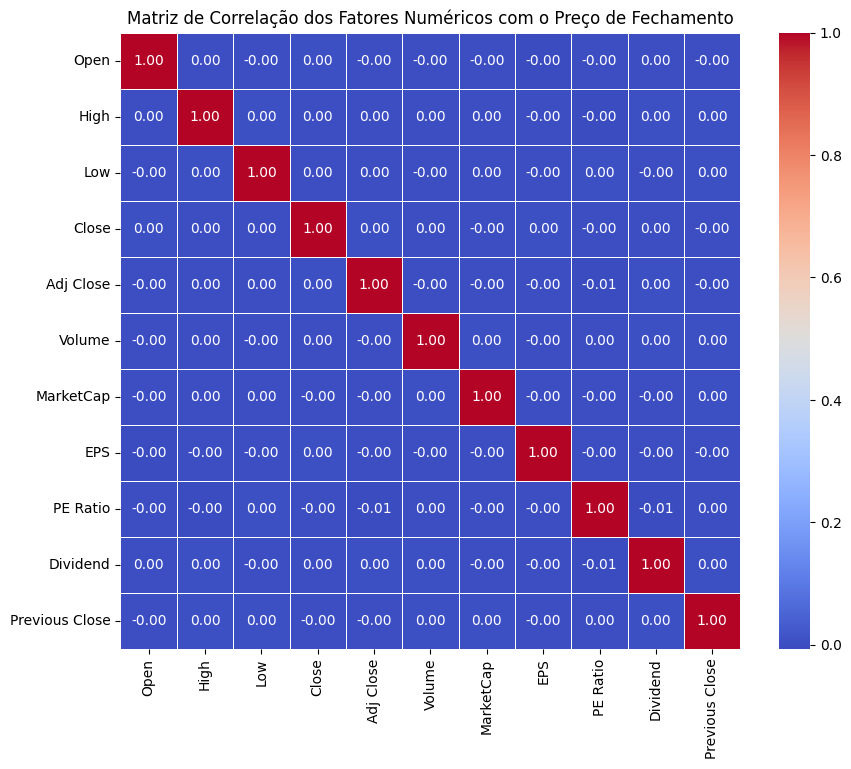


Correlação dos fatores com o preço de fechamento (Close):
Close             1.00
Adj Close         0.00
EPS               0.00
Open              0.00
High              0.00
Volume            0.00
Low               0.00
Dividend          0.00
MarketCap        -0.00
PE Ratio         -0.00
Previous Close   -0.00
Name: Close, dtype: float64


In [ ]:
colunas_numericas = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
                     'MarketCap', 'EPS', 'PE Ratio', 'Dividend', 'Previous Close']

# Certificar-se de que as colunas selecionadas existem no DataFrame
colunas_para_correlacao = [col for col in colunas_numericas if col in nova_planilha.columns]

# Calcular a matriz de correlação para as colunas numéricas selecionadas
matriz_correlacao = nova_planilha[colunas_para_correlacao].corr()

# Visualização da matriz de correlação (opcional, mas útil)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação dos Fatores Numéricos com o Preço de Fechamento')
plt.show()

# Exibir a correlação da coluna 'Close' com as outras colunas numéricas
# Ordenar os resultados para ver os fatores mais influentes (em valor absoluto)
correlacao_close = matriz_correlacao['Close'].sort_values(ascending=False)

print("\nCorrelação dos fatores com o preço de fechamento (Close):")
print(correlacao_close)

### **Análise ao longo do tempo**

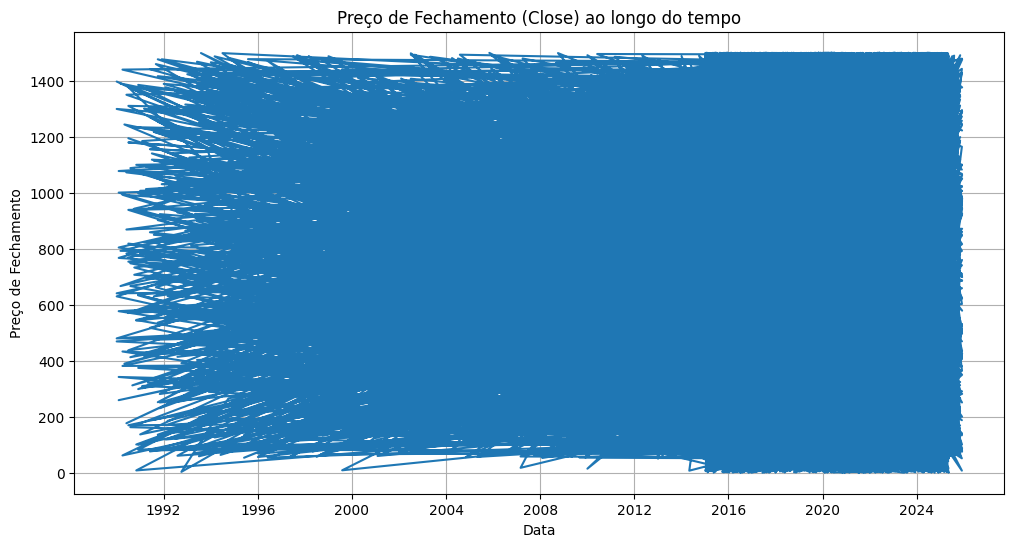

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Converter a coluna 'Date' para datetime, se ainda não estiver
nova_planilha['Date'] = pd.to_datetime(nova_planilha['Date'])

# Definir a coluna 'Date' como indice do DataFrame para análise de séries temporais
df_ts = nova_planilha.set_index('Date')

# Selecionar apenas a coluna 'Close
ts_data = df_ts['Close']

# Plotar a série temporal da coluna 'Close
plt.figure(figsize=(12, 6))
plt.plot(ts_data)
plt.title('Preço de Fechamento (Close) ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.grid(True)
plt.show()

### **Análise das colunas categóricas**

**Preço Médio de Fechamento por Setor**

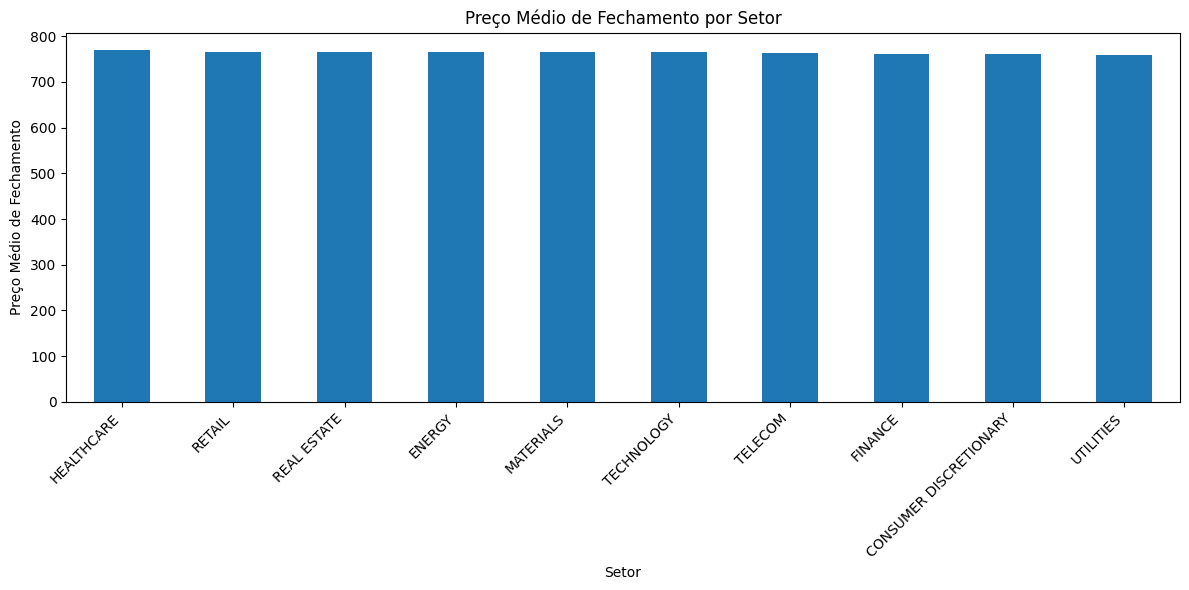


Média do preço de fechamento por Setor:
Sector
HEALTHCARE               769.01
RETAIL                   766.23
REAL ESTATE              766.09
ENERGY                   764.96
MATERIALS                764.89
TECHNOLOGY               764.52
TELECOM                  763.09
FINANCE                  762.07
CONSUMER DISCRETIONARY   761.18
UTILITIES                759.61
Name: Close, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

# Criar o gráfico de barras para as médias do preço de fechamento por Setor
plt.figure(figsize=(12, 6))
nova_planilha.groupby('Sector')['Close'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Preço Médio de Fechamento por Setor')
plt.xlabel('Setor')
plt.ylabel('Preço Médio de Fechamento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Exemplo para uma coluna categórica como 'Sector':
print("\nMédia do preço de fechamento por Setor:")
print(nova_planilha.groupby('Sector')['Close'].mean().sort_values(ascending=False))

**Preço Médio de Fechamento por Indústria**

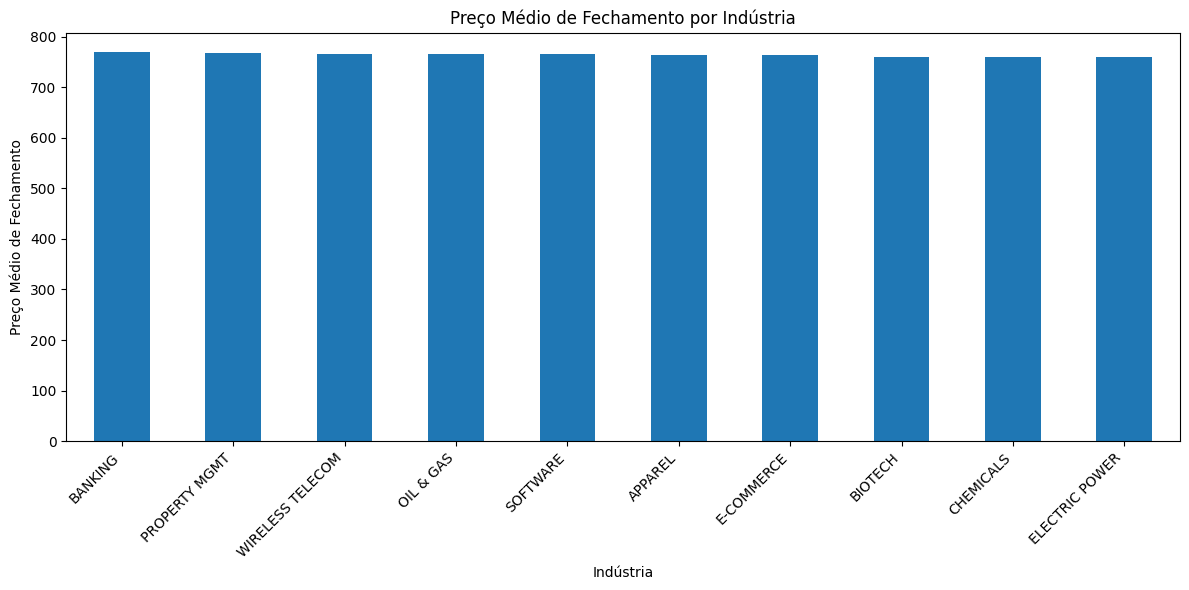


Média do preço de fechamento por indústria:
Industry
BANKING            768.98
PROPERTY MGMT      767.96
WIRELESS TELECOM   766.51
OIL & GAS          765.74
SOFTWARE           764.66
APPAREL            763.80
E-COMMERCE         763.74
BIOTECH            760.41
CHEMICALS          760.00
ELECTRIC POWER     759.85
Name: Close, dtype: float64


In [ ]:
# Criar o gráfico de barras para as médias do preço de fechamento por Indústria
plt.figure(figsize=(12, 6))
nova_planilha.groupby('Industry')['Close'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Preço Médio de Fechamento por Indústria')
plt.xlabel('Indústria')
plt.ylabel('Preço Médio de Fechamento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Exemplo para uma coluna categórica como 'Industry':
print("\nMédia do preço de fechamento por indústria:")
print(nova_planilha.groupby('Industry')['Close'].mean().sort_values(ascending=False))

**Preço Médio de Fechamento por Bolsa (Exchange)**

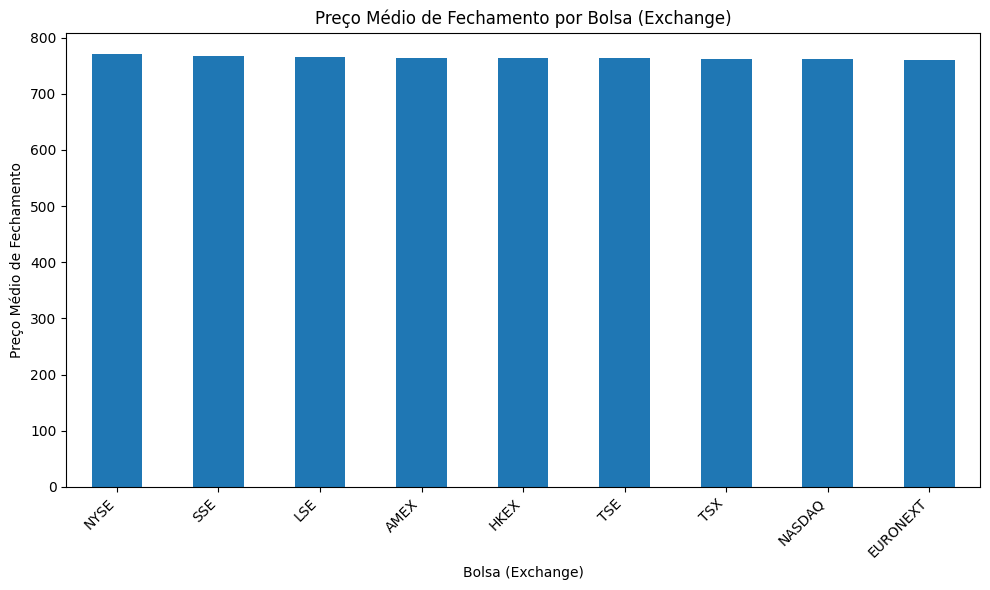


Média do preço de fechamento por Bolsa (Exchange):
Exchange
NYSE       770.02
SSE        766.83
LSE        765.25
AMEX       764.30
HKEX       763.26
TSE        763.00
TSX        762.59
NASDAQ     761.62
EURONEXT   760.52
Name: Close, dtype: float64


In [ ]:
# Criar o gráfico de barras para as médias do preço de fechamento por Bolsa (Exchange)
plt.figure(figsize=(10, 6))
nova_planilha.groupby('Exchange')['Close'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Preço Médio de Fechamento por Bolsa (Exchange)')
plt.xlabel('Bolsa (Exchange)')
plt.ylabel('Preço Médio de Fechamento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Exemplo para uma coluna categórica como 'Exchange':
print("\nMédia do preço de fechamento por Bolsa (Exchange):")
print(nova_planilha.groupby('Exchange')['Close'].mean().sort_values(ascending=False))

**Preço Médio de Fechamento por Ticker (Top 15)**

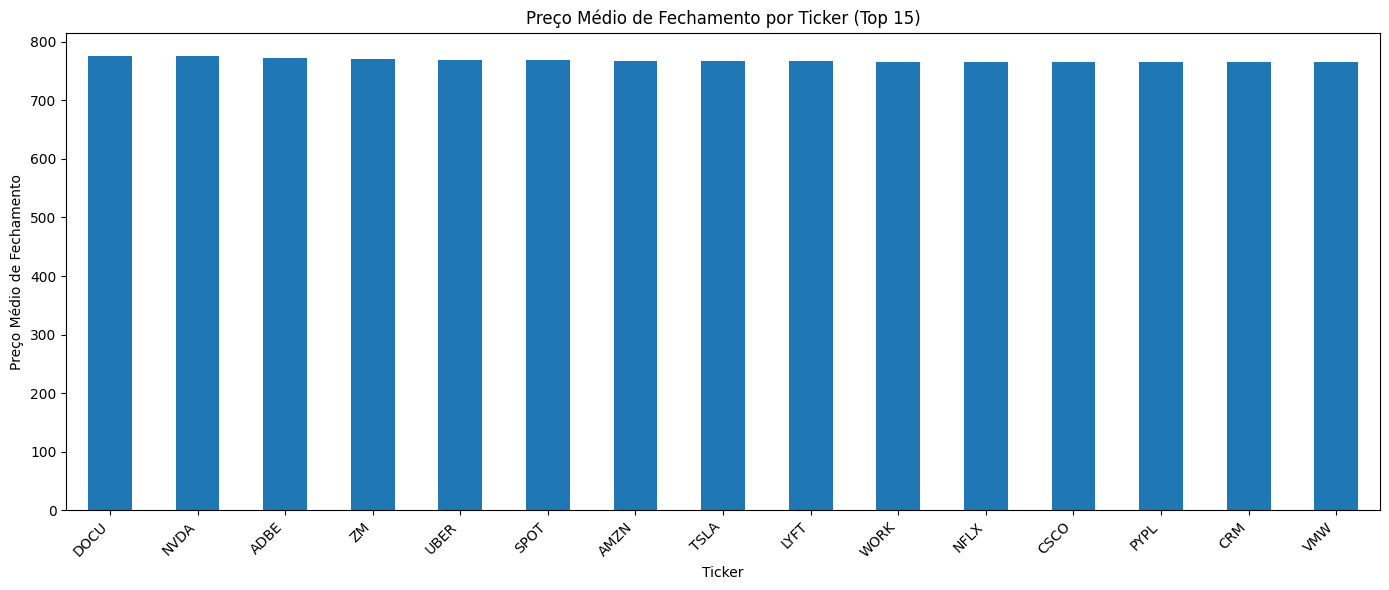


Média do preço de fechamento por Bolsa (Ticker):
Ticker
DOCU   776.47
NVDA   775.69
ADBE   772.52
ZM     770.62
UBER   769.10
SPOT   768.64
AMZN   767.88
TSLA   767.07
LYFT   766.60
WORK   766.26
NFLX   766.25
CSCO   766.14
PYPL   766.14
CRM    766.07
VMW    765.17
SNAP   763.86
TWTR   763.78
INTU   761.87
BABA   761.56
MSFT   761.04
SQ     760.83
IBM    760.17
AAPL   760.04
PINS   759.38
GOOG   758.20
META   757.74
ORCL   756.95
AMD    756.74
SHOP   756.66
INTC   755.88
Name: Close, dtype: float64


In [ ]:

# Criar o gráfico de barras para as médias do preço de fechamento por Ticker (top 15 para melhor visualização)
plt.figure(figsize=(14, 6))
nova_planilha.groupby('Ticker')['Close'].mean().sort_values(ascending=False).head(15).plot(kind='bar')
plt.title('Preço Médio de Fechamento por Ticker (Top 15)')
plt.xlabel('Ticker')
plt.ylabel('Preço Médio de Fechamento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Exemplo para uma coluna categórica como 'Ticker':
print("\nMédia do preço de fechamento por Bolsa (Ticker):")
print(nova_planilha.groupby('Ticker')['Close'].mean().sort_values(ascending=False))

### **Modelo de regressão**

O modelo de Regressão OLS (Ordinary Least
Squares) busca quantificar a relação linear entre uma variável dependente (Close - Preço de Fechamento) e várias variáveis independentes (Open, High, Low, Volume, MarketCap, EPS, PE Ratio, Dividend, Previous Close).

In [ ]:
# Exemplo básico de regressão com statsmodels (considerando apenas algumas variáveis)
import statsmodels.api as sm
import matplotlib.pyplot as plt # Importando matplotlib para os gráficos
import seaborn as sns # Importando seaborn para gráficos mais bonitos (opcional)
import pandas as pd # Importando pandas explicitamente

# Convertendo as colunas 'EPS' e 'PE Ratio' de volta para float, tratando possíveis erros
nova_planilha['EPS'] = pd.to_numeric(nova_planilha['EPS'], errors='coerce')
nova_planilha['PE Ratio'] = pd.to_numeric(nova_planilha['PE Ratio'], errors='coerce')

# Selecionar variáveis independentes (numéricas)
X_numerico = nova_planilha[['Open', 'High', 'Low', 'Volume', 'MarketCap', 'EPS', 'PE Ratio', 'Dividend', 'Previous Close']].copy()

# Converter explicitamente todas as colunas em X_numerico para numérico,
# tratando erros como NaN
for col in X_numerico.columns:
    X_numerico[col] = pd.to_numeric(X_numerico[col], errors='coerce')

# Adicionar uma constante para o intercepto do modelo de regressão
X_numerico = sm.add_constant(X_numerico)

# Variável dependente
y = nova_planilha['Close'].copy()

# Converter explicitamente a variável dependente y para numérico também
y = pd.to_numeric(y, errors='coerce')

# Remover linhas com valores NaN nas variáveis usadas para a regressão
dados_regressao = pd.concat([X_numerico, y], axis=1).dropna()
X_regressao = dados_regressao.drop('Close', axis=1)
y_regressao = dados_regressao['Close']

# Ajustar o modelo de regressão
modelo = sm.OLS(y_regressao, X_regressao).fit()

# Exibir o resumo do modelo
print("\nResumo do Modelo de Regressão OLS (apenas variáveis numéricas):")
print(modelo.summary())


Resumo do Modelo de Regressão OLS (apenas variáveis numéricas):
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3391
Date:                Mon, 09 Jun 2025   Prob (F-statistic):              0.962
Time:                        01:56:40   Log-Likelihood:            -1.4935e+06
No. Observations:              200000   AIC:                         2.987e+06
Df Residuals:                  199990   BIC:                         2.987e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

**Analisando os principais pontos dos resultados:**

**1. Variável Dependente:** Close (Preço de Fechamento das ações).

**2. R-squared (R²):** 0.000
* O R2 (R-quadrado) mede a proporção da variância na variável dependente que é explicada pelas variáveis independentes no modelo. Um valor de 0. 000 significa que zero por cento (0%) da variação no preço de fechamento das ações é explicada por este conjunto de variáveis independentes no seu modelo linear.
* O Adj. R-squared (R-quadrado Ajustado) também é -0. 000, o que reforça essa conclusão, ajustando para o número de variáveis independentes.

**3. F-statistic e Prob (F-statistic):**
* F-statistic: 0.3391
* Prob (F-statistic): 0.962

O teste F avalia a significância estatística global do modelo. A "Prob (F-statistic)" é o p-valor associado a este teste. Um p-valor de 0. 962 é extremamente alto (muito maior que o nível de significância comum de 0.05). Isso significa que não podemos rejeitar a hipótese nula de que todos os coeficientes das variáveis independentes são iguais a zero.

**4. Coeficientes (coef) e P-valores (P> | t|):**
* const: O intercepto do modelo. Significa o valor médio esperado de Close quando todas as outras variáveis são zero.
* Para as demais variáveis (Open, High, Low, Volume, MarketCap, EPS, PE Ratio, Dividend, Previous Close), os coeficientes são muito pequenos (próximos de zero).
* Os p-valores (P> | t |) para todas as variáveis independentes são muito altos (ex: Open 0.426, High 0.534, Previous Close 0.440, etc.). Isso significa que, neste modelo, não há evidência estatística para afirmar que nenhuma dessas variáveis tem uma influência linear significativa sobre o preço de fechamento das ações.

### **Conclusão**

* A análise de correlação mostrou coeficientes próximos de 0.00 para a maioria das variáveis com o Close, indicando ausência de relação linear.
* O modelo de regressão, reforça isso ao apresentar um R-squared de 0.000 e p-valores não significativos para todas as variáveis.

Ambas as análises, portanto, apontam para a mesma conclusão: não há uma relação linear detectável entre os fatores numéricos selecionados e o preço de fechamento das ações nessa base de dados.

Além disso, na análise temporal é possivel notar a ausência de uma tendência clara de longo prazo, o que sugere que **a performance da ação é mais influenciada por eventos de médio e curto prazo ou por ciclos econômicos e setoriais, do que por um crescimento orgânico e constante ao longo de décadas.**

## Pergunta 2: Existe alguma associação entre características setoriais/industriais e o desempenho das ações?

Esta análise tem como objetivo entender se o desempenho das ações, considerando fatores como retorno percentual e indicadores de avaliação, varia de forma consistente entre diferentes setores e indústrias do mercado.

A proposta é verificar se determinados setores e subsetores apresentam melhores resultados que outros e se essas diferenças podem estar ligadas às características próprias de cada área, como grau de maturidade, perfil de risco ou estratégia financeira adotada. Também se busca observar se, dentro de um mesmo setor, as indústrias seguem padrões semelhantes ou se há contrastes importantes em relação ao desempenho das ações.

In [ ]:

nova_planilha['Close'] = pd.to_numeric(nova_planilha['Close'], errors='coerce')

nova_planilha.dropna(subset=['Close'], inplace=True)

# Certifique-se de que 'Date' é datetime e 'Ticker' é string
nova_planilha['Date'] = pd.to_datetime(nova_planilha['Date'], format='mixed', dayfirst=False, errors='coerce')
nova_planilha['Ticker'] = nova_planilha['Ticker'].astype(str).str.strip().str.upper()

# Ordenar os dados por Ticker e Data para o cálculo correto do pct_change()
nova_planilha = nova_planilha.sort_values(['Ticker', 'Date'])

# Calcular o retorno percentual do fechamento por ativo
# O pct_change() gera NaN para a primeira ocorrência de cada grupo (Ticker)
nova_planilha['Retorno (%)'] = nova_planilha.groupby('Ticker')['Close'].pct_change() * 100

# Remover retornos absurdos que distorcem o gráfico
# Certifique-se de que esta linha está ativa e faz sentido para seus dados.
# Se muitos valores estiverem fora dessa faixa, eles serão removidos ou se tornarão NaN (se você usar replace em vez de filtrar).
nova_planilha = nova_planilha[
    (nova_planilha['Retorno (%)'] > -100) &
    (nova_planilha['Retorno (%)'] < 300)
]

nova_planilha['Retorno (%)'] = nova_planilha['Retorno (%)'].fillna(0)

# Criar coluna com o mês no formato string para o eixo x
nova_planilha['Month'] = nova_planilha['Date'].dt.to_period('M').astype(str)


<ipython-input-193-30c6f8147bbc>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nova_planilha['Retorno (%)'] = nova_planilha['Retorno (%)'].fillna(0)


Gráfico de linha do tempo de Retorno médio por setor

In [ ]:
# Ordenar os dados por Ticker e Data
nova_planilha = nova_planilha.sort_values(['Ticker', 'Date'])

In [ ]:
# Calcular o retorno percentual do fechamento por ativo
nova_planilha['Retorno (%)'] = nova_planilha.groupby('Ticker')['Close'].pct_change() * 100

In [ ]:
# Remover retornos absurdos que distorcem o gráfico
nova_planilha = nova_planilha[
    (nova_planilha['Retorno (%)'] > -100) &
    (nova_planilha['Retorno (%)'] < 300)
]

In [ ]:
# Criar coluna com o mês no formato string para o eixo x
nova_planilha['Month'] = nova_planilha['Date'].dt.to_period('M').astype(str)

In [ ]:
# Agrupar por mês e setor e calcular a média do retorno
retorno_mensal = (
    nova_planilha
    .groupby(['Month', 'Sector'])['Retorno (%)']
    .mean()
    .reset_index()
)


In [ ]:
# Converter para datetime para ordenação correta no eixo X
retorno_mensal['Month'] = pd.to_datetime(retorno_mensal['Month'])

In [ ]:
from datetime import datetime

# Pegar o ano atual
ano_atual = datetime.now().year

# Filtrar a base para anos a partir de 2015 (ou ano_atual - 10)
retorno_mensal_filtrado = retorno_mensal[retorno_mensal['Month'].dt.year >= ano_atual - 10]


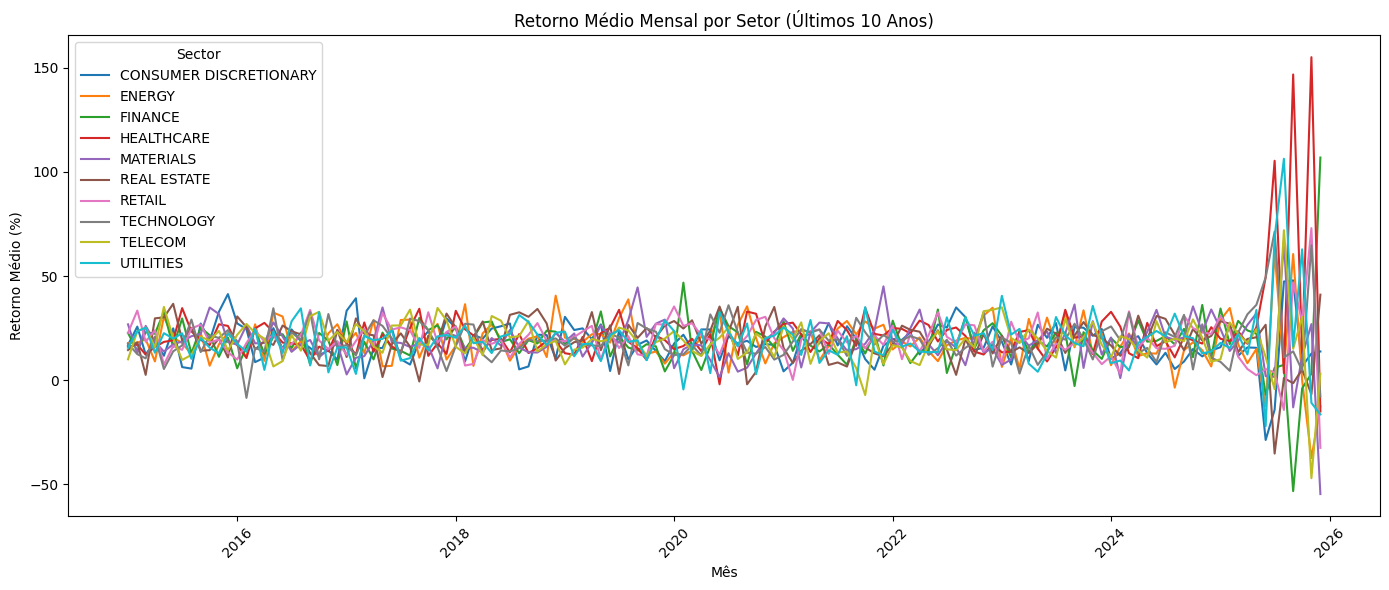

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=retorno_mensal_filtrado, x='Month', y='Retorno (%)', hue='Sector')

plt.title('Retorno Médio Mensal por Setor (Últimos 10 Anos)')
plt.xlabel('Mês')
plt.ylabel('Retorno Médio (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 O que ele mostra:

1.  A evolução do desempenho médio das ações por setor ao longo do tempo
2.   Quais setores estão crescendo mais ou oscilando mais mês a mês
3.  Padrões de alta ou baixa em setores específicos.

1. Boxplot de Retorno por Industry

In [ ]:
# Criar coluna com o mês
nova_planilha['Month'] = nova_planilha['Date'].dt.to_period('M').astype(str)

# Agrupar por mês e Industry e calcular retorno médio
retorno_industria_mensal = (
    nova_planilha.groupby(['Month', 'Industry'])['Retorno (%)']
    .mean()
    .reset_index()
)


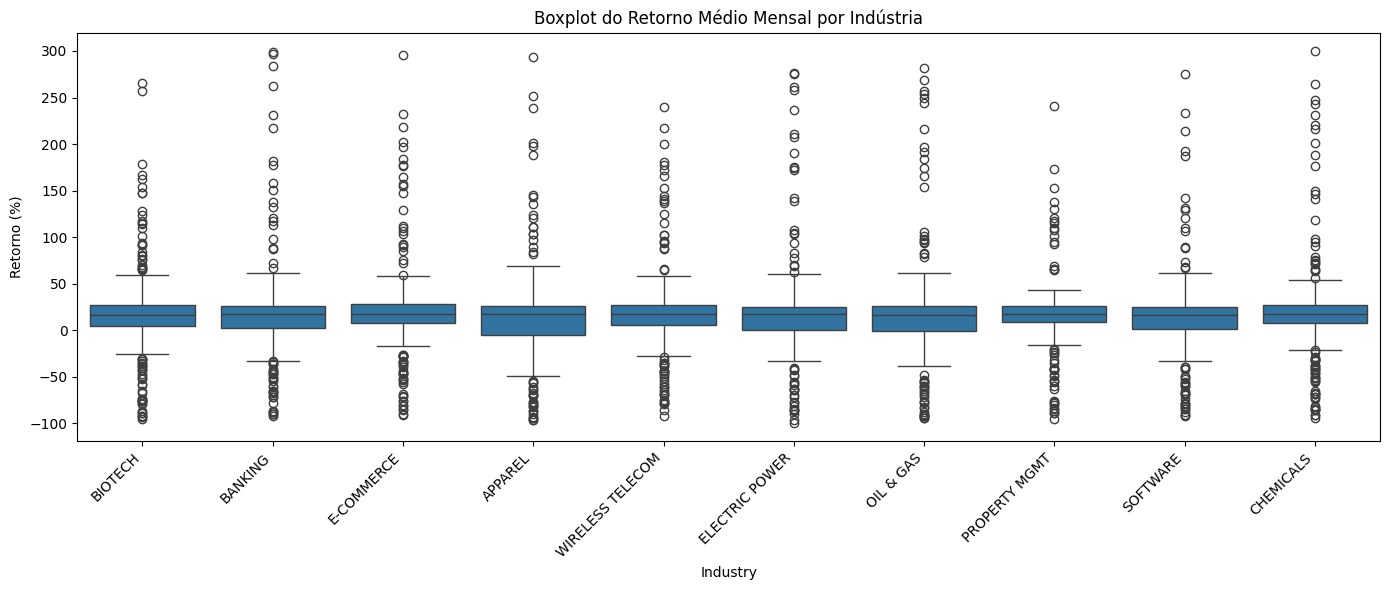

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=retorno_industria_mensal, x='Industry', y='Retorno (%)')
plt.title('Boxplot do Retorno Médio Mensal por Indústria')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

2. Boxplot de Retorno por Sector

In [ ]:
# Converter a coluna 'Date' para datetime se ainda não estiver
nova_planilha['Date'] = pd.to_datetime(nova_planilha['Date'], errors='coerce')

In [ ]:
# Ordenar por Ticker e Data antes de calcular a variação percentual
nova_planilha = nova_planilha.sort_values(['Ticker', 'Date'])

In [ ]:
# Calcular o retorno percentual com base em fechamento
nova_planilha['Retorno (%)'] = nova_planilha.groupby('Ticker')['Close'].pct_change() * 100

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=retorno_setor_mensal, x='Sector', y='Retorno (%)')

plt.title('Distribuição do Retorno Médio Mensal por Setor')
plt.xlabel('Setor')
plt.ylabel('Retorno (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



NameError: name 'retorno_setor_mensal' is not defined

<Figure size 1400x600 with 0 Axes>

3. Comparação entre Retorno por Setor e por Indústria

In [ ]:
# Calcular média de retorno por setor
media_setor = nova_planilha.groupby('Sector')['Retorno (%)'].mean()

In [ ]:
# Calcular média de retorno por indústria
media_industria = nova_planilha.groupby('Industry')['Retorno (%)'].mean()

In [ ]:
df_setor = media_setor.rename('Retorno (%)').reset_index()
df_industria = media_industria.rename('Retorno (%)').reset_index()


In [ ]:
# Juntar os dados com rótulo
df_setor['Tipo'] = 'Setor'
df_industria['Tipo'] = 'Indústria'

In [ ]:
# Padronizar os nomes das colunas para unir
df_setor.columns = ['Categoria', 'Retorno (%)', 'Tipo']
df_industria.columns = ['Categoria', 'Retorno (%)', 'Tipo']

df_comparativo = pd.concat([df_setor, df_industria], ignore_index=True)

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_comparativo, x='Retorno (%)', y='Categoria', hue='Tipo')
plt.title('Comparação: Retorno Médio por Setor e Indústria')
plt.tight_layout()
plt.show()


### Conclusão:

Os resultados mostram que setor e indústria influenciam sim o desempenho das ações. Setores como tecnologia e financeiro, por exemplo, apresentaram retornos mais elevados e maior variação, indicando um perfil voltado para crescimento. Já setores como utilities e telecomunicações mostraram retornos mais baixos.

Esse padrão também aparece no nível das indústrias. Mesmo dentro de um setor como tecnologia, há indústrias com desempenho superior, como software, e outras com desempenho mais modesto, como telecomunicações. Com base nisso, é possível concluir que existe uma associação clara entre as classificações setoriais e industriais e o comportamento de desempenho das ações analisadas.

### Sugestão Estratégica para o Cliente:

Sabendo que setor e indústria afetam o desempenho, o cliente pode montar uma carteira mais equilibrada. Isso ajuda a reduzir riscos e aumentar as chances de bom retorno no longo prazo


Com base nos resultados, uma boa ideia é **dividir os investimentos entre setores diferentes**, para equilibrar risco e retorno.

#### Exemplo de distribuição:

- **40% em setores de crescimento**  
  (Esses setores costumam ter maior chance de valorização rápida, mas também são mais arriscados (os preços sobem e descem mais).) — Tecnologia, Biotech, Software

- **40% em setores estáveis**  
  (retorno mais regular) — Financeiro, Energia, Imóveis

- **20% em setores defensivos**  
  (mais seguros, bons dividendos) — Utilities, Telecom, Bancos

## Pergunta 3: Como o volume de negociações e os dividendos distribuídos se comportam entre diferentes setores e ao longo do tempo?

A análise dessa pergunta tem como objetivo entender como o volume de negociações e os dividendos pagos se comportam nos diferentes setores do mercado, tanto ao longo do tempo quanto em comparação entre eles.

A ideia é analisar quais setores atraem mais investidores — refletido no volume negociado — e quais são mais focados em gerar retorno direto para os acionistas, por meio dos dividendos. Além disso, também tentar entender se existe algum tipo de relação entre esses dois fatores. Por exemplo: se setores que pagam mais dividendos costumam ter menor volume de negociação ou se não existe uma relação clara entre eles.

****
**Relações entre Dividend, Volume, Sector e Date**
**Aspectos a serem analisados:**

**- Comportamento ao longo do tempo (tendência, crescimento, sazonalidade)**

**- Diferenças e características entre setores (mais estáveis, mais voláteis, mais generosos em dividendos, mais negociados)**

In [ ]:
#import nas bibliotecas que vão ser usadas
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
#Trazer para datetime e Criar colunas auxiliares para tempo
nova_planilha['Date'] = pd.to_datetime(nova_planilha['Date'])

nova_planilha['Year'] = nova_planilha['Date'].dt.year
nova_planilha['Month'] = nova_planilha['Date'].dt.month

In [ ]:
#entender comportamento ao longo do tempo e por setor
annual_sector = nova_planilha.groupby(['Year', 'Sector']).agg(
    volume_medio=('Volume', 'mean'),
    dividendo_medio=('Dividend', 'mean')
).reset_index()

Dividir em tópicos os insights:
- Linha do tempo - Volume médio por setor
- Linha do tempo - Dividendos médios por setor
- Boxplot por setor - Distribuição das colunas para checar crescimento e declínio
- Correlação entre o volume e dividendos médios por setor
- Clusterização por setores - agrupa setores com padrões semelhantes, sintetizando a análise.

### Linha do tempo — Volume médio por setor (PowerBI)




O volume de negociações é um indicador direto do interesse dos investidores e da liquidez de um setor. Setores com maior volume costumam ter negociações mais ativas, facilitando a entrada e saída de investidores.

Além disso, observar o volume ajuda a identificar se determinados setores ganham mais atenção em períodos específicos, revelando possíveis movimentos de mercado, crises, tendências ou ciclos de interesse.

O seaborn/matplotlib não lida bem direto com objetos do tipo Period. Ele espera algo como string, datetime ou numérico para o eixo x

Dessa forma, geramos a coluna Month como string

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=annual_sector, x="Year", y="volume_medio", hue="Sector", marker="o")
plt.title("Volume Médio de Negociações por Setor ao Longo dos Anos")
plt.ylabel("Volume Médio")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Percebemos que há volumes anômalos até 1e11 desde 1990 até 2014, sugerindo outliers extremos (possivelmente por ativos com splits ou consolidações mal processadas).

**Inferência**: Esses valores distorcem completamente a escala do gráfico, "achatando" os dados válidos após 2015.

**Depois de 2015**:

Os volumes médios por setor ficam muito mais próximos entre si e em uma faixa plausível (visualmente parece entre 1e6 e 1e9).

O gráfico ganha uma forma mais regular, sugerindo que os dados recentes estão mais limpos, tendo um comportamento consistente e saudável após 2015.


**Inferência**: os dados modernos (últimos 10 anos) são mais confiáveis e consistentes para análise.



In [ ]:
nova_planilha.groupby('Sector')['Volume'].describe()

In [ ]:
from datetime import datetime

# Ano atual
current_year = datetime.now().year

# Filtrar os últimos 10 anos
filtered_data = annual_sector[annual_sector["Year"] >= current_year - 10]

# Gerar o gráfico com os dados filtrados
plt.figure(figsize=(14, 6))
sns.lineplot(data=filtered_data, x="Year", y="volume_medio", hue="Sector", marker="o")
plt.title("Volume Médio de Negociações por Setor (Últimos 10 Anos)")
plt.ylabel("Volume Médio")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

A partir desse gráfico de linhas (houve mudança na métrica de medida do eixo y) e da análise do describe, percebemos algumas coisas:

**Setores com maior volume:**

→ **Finance e Technology** são os mais líquidos, refletindo forte interesse do mercado, especulação e maior volume de transações.

**Setores Estagnados ou Voláteis:**

→ **Retails, Utilities e Real Estate** apresentam volume mais estável ou até declinante, podendo indicar menor atratividade especulativa ou investimentos mais defensivos e estáveis.

**Tendências observadas:**

→ Alguns setores, como **Materials ou Industrials**, oscilam bastante, sugerindo sensibilidade a ciclos econômicos;

→ Setores como **Energy, Telecom e Consumer Discretionary** mostram uma tendência de crescimento no volume médio. Isso pode refletir o aumento do interesse em ações ligadas à inovação e consumo digital.

→ Após 2015, o mercado se mostra mais equilibrado em termos de liquidez, com setores anteriormente menos negociados ganhando tração, especialmente devido a movimentos de digitalização e aumento de investidores pessoa física.

### Dividendos médios distribuídos por setor ao longo dos anos (PowerBI)

Os dividendos representam o retorno direto ao acionista e refletem a estratégia financeira e a maturidade das empresas de cada setor. Setores consolidados tendem a distribuir mais.

Importante para entender se os dividendos são estáveis, crescentes ou voláteis.

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=annual_sector, x="Year", y="dividendo_medio", hue="Sector", marker="o")
plt.title("Dividendos Médios Distribuídos por Setor ao Longo dos Anos")
plt.ylabel("Dividendo Médio")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Nesse gráfico, também vemos uma grande variação antes de 2015, e depois dessa data eles se achatam, mantendo um comportamento constante e uniforme, podendo ser justificado por uma padronização nas políticas de dividendos entre empresas ou um amadurecimento dos setores, um cenário de menos risco para investidores orientados a dividendos.



In [ ]:
current_year = datetime.now().year

# Filtrar apenas os últimos 10 anos
filtered_data = annual_sector[annual_sector["Year"] >= current_year - 10]

# Gerar o gráfico com os dados filtrados
plt.figure(figsize=(14, 6))
sns.lineplot(data=filtered_data, x="Year", y="dividendo_medio", hue="Sector", marker="o")
plt.title("Dividendos Médios Distribuídos por Setor (Últimos 10 Anos)")
plt.ylabel("Dividendo Médio")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
nova_planilha.groupby('Sector')['Dividend'].describe()

Com base nos gráficos de linhas (o mais abrangente e também o mais detalhado nos últimos 10 anos), podemos inferir:

**Setores com maior pagamento de dividendos:**

→ **Healthcare e Real State**, que são setores mais consolidados, que geralmente distribuem mais dividendos nos últimos 10 anos devido à geração de caixa estável e menor necessidade de reinvestimento.

**Setores com menor pagamento:**

→ **Technology** é um setor que está em constante crescimento e costumam reter lucros para financiar inovação e expansão, resultando em dividendos mais baixos.

**Tendências:**

→ Dividendos estáveis em **Utilities e Telecom** por serem setores maduros e menos voláteis.

→ **Finance e Consumer Discretionary** começa a mostrar mais um leve aumento nos dividendos nos últimos 4 anos, sinalizando amadurecimento de algumas empresas.

→ Há variações significativas ao longo do tempo para setores como **Materials e Healthcare**, sugerindo sensibilidade a ciclos econômicos.

 Porém, no geral, os dividendos apresentam um grande equilíbrio entre os setores, podendo inferir que:

 - Padronização de Políticas de Dividendos

 - Maturidade do Mercado

 - Ambiente Econômico Estável

 Mas esse equilíbrio também pode diminuir oportunidades de diferenciação simples para o investidor, exigindo cuidado.

### Boxplot por setor (tanto de dividendos como de volume)

Permite comparar a distribuição geral entre os setores


Responde se certos setores têm volume ou dividendos mais altos ou mais estáveis (pela dispersão e outliers)

Volume por setor:

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=nova_planilha, x="Sector", y="Volume")
plt.yscale("log")  # Escala logarítmica no eixo Y
plt.title("Distribuição do Volume de Negociações por Setor (Escala Log)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Uma boa visualização para ajudar nesse tópico é o seguinte barplot de Volume médio de negociações por setor:

In [ ]:
volume_medio_setor = nova_planilha.groupby("Sector")["Volume"].mean().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(14, 6))
sns.barplot(x=volume_medio_setor.index, y=volume_medio_setor.values)
plt.title("Volume Médio de Negociações por Setor")
plt.ylabel("Volume Médio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Pelo Barplot com média por setor e pelo boxplot podemos inferir que:

- As caixas têm tamanhos e posições parecidas, indicando que os volumes de negociação estão relativamente equilibrados entre os setores, na mediana e nos quartis.

- Os setores de **Financeiro e Tecnologia**: Médias e medianas ligeiramente mais altas e baixa dispersão → Volume alto e estável -> Maior atividade média de negociação.

- Já os setores de **Retail e Healthcare**: média levemente mais baixa, mas picos esporádicos → Volume de negociação geralmente mais baixo, com momentos pontuais de interesse. Isso é comum em setores defensivos, que atraem menos especulação e movimentos de curto prazo.

****
****
Dividendo por setor:

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=nova_planilha, x="Sector", y="Dividend")
plt.xticks(rotation=90)
plt.title("Distribuição de Dividendos por Setor")
plt.tight_layout()
plt.show()

A distribuição de dividendos é equilibrada e homogênea entre os setores, sugerindo que não há um segmento claramente mais generoso ou mais conservador na distribuição de lucros. Isso pode refletir uma maturidade parecida entre empresas listadas de diferentes setores

Para forma de detalhamento, temos um gráfico de barras com média de dividendos por setor:

In [ ]:
media_dividendo_setor = nova_planilha.groupby("Sector")["Dividend"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=media_dividendo_setor.index, y=media_dividendo_setor.values)
plt.title("Média de Dividendos por Setor")
plt.ylabel("Dividendo Médio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Já no dividendo, vemos que os setores de:

- **Healthcare e Energy**: Se destacam levemente com dividendos mais altos, estáveis e consistentes. Isso pode indicar uma política de distribuição de lucros mais generosa nesse setor ou maior estabilidade de fluxo de caixa

- **Utilities e Telecom**: Apresenta uma ligeira baixa distribuição → Apesar de tradicionalmente defensivos, apresentam dividendos médios um pouco inferiores, o que pode refletir um foco maior em reinvestimento ou controle regulatório mais restritivo.

### Clusterização de Setores


Agrupa setores com padrões semelhantes de volume e dividendo, o que sintetiza a análise e segmenta os comportamentos.

Permite também que você trate grupos de setores como "tipos" de comportamento e verificar como os clusters se modificam ao longo do tempo, apoiando uma análise mais rica e segmentada da dinâmica setorial.

In [ ]:
# Normalizar os dados para clusterização
X = annual_sector[['volume_medio', 'dividendo_medio']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
annual_sector['Cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
# Visualização
plt.figure(figsize=(14, 7))
sns.scatterplot(data=annual_sector, x='volume_medio', y='dividendo_medio', hue='Cluster', palette='Set2', s=100)

# Adicionar nome do setor e ano ao gráfico
for _, row in annual_sector.iterrows():
    plt.text(row['volume_medio'], row['dividendo_medio'], f"{row['Sector']} ({row['Year']})", fontsize=7, alpha=0.7)

plt.title('Clusterização Anual de Setores por Volume e Dividendos Médios')
plt.xlabel('Volume Médio de Negociações')
plt.ylabel('Dividendos Médios')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

Com base nisso, podemos inferir algumas coisas:

Cluster 0 (cor esverdeada)
- Volume médio moderado
- Dividendos médio/elevados
- Pode representar setores consolidados e atrativos (visando crescimento) para dividendos, mas com alta negociação. (ex: Finance ou Technology em momentos de estabilidade)
- Empresas de alto giro, foco em crescimento, mas com alguma remuneração aos acionistas.


Cluster 1 (cor alaranjada)
- Volume médio mais baixo

- Dividendos médios/ mais altos

- Provavelmente inclui setores tradicionais (defensivos) com menor liquidez, como Utilities ou Energy em mercados menos líquidos.

- Setores maduros, defensivos, foco em dividendos consistentes

Cluster 2 (Cor azulada)
- Volume mais baixo
- Dividendo médio para baixo
- Empresas menores ou em mercados mais voláteis.
- Exemplo: Consumer Discretionary

****
O código fica meio poluído, então pensei em calcular apenas a média dos setores sem ver todos os anos, como vai ser visto no gráfico a seguir.

In [ ]:
sector_mean = nova_planilha.groupby('Sector').agg(
    volume_medio=('Volume', 'mean'),
    dividendo_medio=('Dividend', 'mean')
).reset_index()

# Normalizar os dados
X = sector_mean[['volume_medio', 'dividendo_medio']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
sector_mean['Cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
# Gráfico de dispersão por setor
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sector_mean, x='volume_medio', y='dividendo_medio', hue='Cluster', palette='Set2', s=100)

# Adicionar rótulos de setores
for _, row in sector_mean.iterrows():
    plt.text(row['volume_medio'], row['dividendo_medio'], row['Sector'], fontsize=8, alpha=0.7)

plt.title('Clusterização de Setores por Volume e Dividendos Médios (Histórico)')
plt.xlabel('Volume Médio de Negociações')
plt.ylabel('Dividendos Médios')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

Porém, esse gráfico é igual ao realizado na Correlação entre os Volumes Médios e Dividendos médios por setor, fazendo com que seja a mesma análise, presente na próxima célula.

### Correlação entre o volume médio e os dividendos médios por setor (PowerBI)


Agrupa o dataframe pelo campo 'Sector', calculando a média do 'Volume' e de 'Dividend' para cada setor.

O reset_index() serve para transformar o índice agrupado em coluna novamente.

Vai gerar uma tabela onde cada linha representa um setor, e as colunas mostram o Volume médio e o Dividendo médio daquele setor

In [ ]:
sector_summary = nova_planilha.groupby('Sector').agg({
    'Volume': 'mean',
    'Dividend': 'mean'
}).reset_index()

Vamos calcular a correlação de Pearson entre as duas colunas — 'Volume' e 'Dividend'.

A correlação varia de -1 a +1:

- Próximo de +1: relação diretamente proporcional (ambos sobem juntos).

- Próximo de -1: relação inversamente proporcional (um sobe, outro desce).

- Próximo de 0: sem correlação linear.


In [ ]:
correlation = sector_summary['Volume'].corr(sector_summary['Dividend'])
correlation

Agora criamos a visualização (Gráfico de dispersão) da correlação entre as colunas:

O eixo X representa o Volume médio, o eixo Y representa os Dividendos médios.

Cada ponto é um setor, identificado pelas cores.

Isso permite visualizar se existe uma tendência de relação (por exemplo, se setores com alto volume tendem a ter dividendos menores, e vice-versa).

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=sector_summary, x='Volume', y='Dividend', hue='Sector', s=100)
plt.title('Relação entre Volume Médio e Dividendos Médios por Setor')
plt.xlabel('Volume Médio')
plt.ylabel('Dividendos Médios')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
print(f'{correlation}')

Por meio desse gráfico, vemos que existe uma relação inversamente proporcional moderada, já que correlação estimada entre volume médio e dividendos médios fica em torno de -0,4, como vimos no cálculo da correlação (correlation):

- Setores com maior volume de negociação (ex.: **Tecnologia e Financeiro**) costumam ter menor pagamento de dividendos.

- Setores com maiores dividendos (ex.: **Energy e Healthcare**) geralmente têm menor volume de negociação quando comparados aos outros setores.

Porém, como visto é uma relação moderada, tendo alguns pontos que não seguem, como:
- Real State e Consumer Discretionary possuem dividendos e volumes acima da média indicam empresas maduras, atraentes e bem posicionadas.
- Utilities, Telecom e Materials possuem volumes na média ou abaixo e dividendos abaixo ou igual a média, pode-se inferir uma transição, enfrentando desafios estruturais ou perdendo apelo para o investidor.

Mas por que isso existe?

- Setores com foco em crescimento priorizam o reinvestimento dos lucros, atraindo mais negociações por especulação ou valorização futura (mais volume, menos dividendos).

- Setores maduros e estáveis preferem distribuir lucros para acionistas, mantendo investidores focados em renda passiva, não em negociação ativa (mais dividendos, menos volume).

Isso reflete o clássico **TRADE-OFF** entre crescimento e distribuição de caixa, onde setores que priorizam reinvestimento atraem mais negociações, enquanto setores maduros oferecem estabilidade e foco em dividendos.


Percebe-se também que o eixo x (volume) apresenta uma variação mais perceptível do que o eixo y (dividendos), sugerindo que o volume é mais sensível a diferenças entre setores do que os dividendos.

### Conclusão Sintetizada

A análise realizada oferece à C3 uma visão estratégica sobre como o volume de negociações e os dividendos distribuídos se comportam entre diferentes setores e ao longo do tempo, permitindo transformar dados em inteligência acionável.
A análise revela que, após 2015, os dados entre os setores tornam-se mais consistentes e confiáveis, eliminando distorções dos anos anteriores.

Observa-se um padrão bem definido no mercado: setores como Finance e Technology apresentam os maiores volumes de negociação, refletindo alta liquidez, maior interesse especulativo e foco em crescimento, com menor distribuição de dividendos.

Por outro lado, setores como Energy e Healthcare mantêm volumes médios, mas se destacam pela distribuição consistente e elevada de dividendos, alinhados a modelos de negócio mais maduros e defensivos. Setores como Real State e Consumer Discretionary assumem posições intermediárias, com dividendos relativamente estáveis e volumes moderados.

Fica evidente um trade-off estrutural entre volume e dividendos: setores mais líquidos priorizam reinvestimento e crescimento, enquanto setores mais estáveis oferecem retorno via dividendos. Esse comportamento reflete a maturidade de parte do mercado, o impacto da digitalização e mudanças no perfil dos investidores nos últimos anos.

Esses insights são fundamentais para que a empresa possa:
- Mapear setores com maior potencial de valorização ou geração de renda.
- Identificar riscos associados à volatilidade ou à estagnação de determinados setores.
- Apoiar a construção de modelos preditivos mais eficientes, alinhando estratégias de alocação, diversificação e timing de mercado.

Dessa forma, a C3 potencializa sua capacidade de tomar decisões mais assertivas, extrair oportunidades ocultas e mitigar riscos, fortalecendo sua inteligência competitiva e suas estratégias de investimento.




## Pergunta 4: O que pode ser feito para otimizar as vendas?


###  Objetivo

Identificar sinais, padrões e comportamentos nos dados que possam indicar momentos ideais para realizar vendas antes de quedas de preço.


### Matriz de Correlação

As colunas numéricas que podem influenciar o preço de fechamento e, consequentemente, serem relevantes para otimizar as vendas são: **'Open', 'High', 'Low', 'Adj Close', 'Volume', 'MarketCap', 'EPS', 'PE Ratio', 'Dividend', 'Previous Close'**.

In [ ]:
# Lista das colunas que devem ser numéricas para a correlação
colunas_numericas_para_corr = ['Open', 'High', 'Low', 'Adj Close',
                               'Volume', 'MarketCap', 'EPS', 'PE Ratio',
                               'Dividend', 'Previous Close']

# passando pra numerico só pra garantir
for col in colunas_numericas_para_corr:
    if col in nova_planilha.columns:
        nova_planilha[col] = pd.to_numeric(nova_planilha[col], errors='coerce')

# Selecionando apenas as colunas numéricas relevantes
df_numerico = nova_planilha[colunas_numericas_para_corr]



### Matriz de Correlação Pearson

In [ ]:
# Calculando a matriz de correlação de Pearson
matriz_correlacao = df_numerico.corr(method='pearson')

# Imprimir a matriz de coeficientes
print("Matriz de Correlação de Pearson:")
print(matriz_correlacao)

In [ ]:
# Plotar o heatmap da matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação de Pearson das Variáveis Numéricas')
plt.show()

Essa matriz ta dizendo que não há uma correlação linear entre essas colunas. Mas é possível fazer outras analises mais detalhadas.

### Matriz de Correlação Spearman

Detecta relações monótonas, não necessariamente lineares.


In [ ]:
# Selecionar apenas colunas numéricas
dados_numericos = nova_planilha.select_dtypes(include=['float64', 'int64'])

# Matriz de correlação
corr = dados_numericos.corr(method='spearman')  # ou method='pearson'

# Heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação - Spearman')
plt.tight_layout()
plt.show()


Essa matriz mostra a possivel correlação linear entre as colunas Open, Close e Retorno diário

### Analise Gráfica dos Dados [Todos os registros]

Investigar a evolução das variáveis ao longo do tempo pode revelar tendências, padrões e eventos que impactam o preço e o volume, fornecendo insights para a otimização de vendas.


Começo com Open e Close pois foi o que a matriz de correlação indicou

### Open e Close em Relação ao Lucro

In [ ]:
# Cria a coluna retorno_diario como a diferença entre preço de fechamento e abertura
nova_planilha['retorno_diario'] = nova_planilha['Close'] - nova_planilha['Open']


In [ ]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(
    nova_planilha['Open'],
    nova_planilha['Close'],
    c=nova_planilha['retorno_diario'],
    cmap='coolwarm',
    alpha=0.7
)
plt.colorbar(scatter, label='Lucro (Close - Open)')
plt.xlabel('Preço de Abertura (Open)')
plt.ylabel('Preço de Fechamento (Close)')
plt.title('Open vs Close colorido por Lucro')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Quanto maior open -> mais azul o gráfico fica  ['lucro menor]

Quanto menor open -> menos azul o gráfico fica  ['lucro maior']

### Lucro Médio x Open

In [ ]:
# Define as faixas (bins) de valores de Open
faixas = pd.cut(nova_planilha['Open'], bins=20)

# Calcula a média do lucro em cada faixa
lucro_por_faixa = nova_planilha.groupby(faixas)['retorno_diario'].mean()

plt.figure(figsize=(12,6))
lucro_por_faixa.plot(kind='bar', color='mediumseagreen')
plt.title('Lucro Médio por Faixa de Preço de Abertura (Open)')
plt.xlabel('Faixa de Preço de Abertura')
plt.ylabel('Lucro Médio')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Quanto maior o valor de abertura menor o lucro médio
Quanto menor o valor de abertura maior o lucro médio

###Lucro Médio x Close

In [ ]:
# Define as faixas de fechamento
bins = [0, 10, 20, 50, 100, 200, 500, np.inf]
labels = ['0-10', '10-20', '20-50', '50-100', '100-200', '200-500', '500+']

# Agrupa os registros por faixa de fechamento
nova_planilha['faixa_close'] = pd.cut(nova_planilha['Close'], bins=bins, labels=labels)

# Calcula a média do lucro diário por faixa
lucro_por_faixa_close = nova_planilha.groupby('faixa_close')['retorno_diario'].mean()

# Plotagem
plt.figure(figsize=(10,6))
lucro_por_faixa_close.plot(kind='bar', color='mediumseagreen', edgecolor='black')

plt.title('Média de Lucro Diário por Faixa de Preço de Fechamento (Close)')
plt.xlabel('Faixa de Preço de Fechamento (R$)')
plt.ylabel('Média de Lucro Diário (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Média Volume x Mês

In [ ]:
# Extrair o mês da coluna 'Date'
nova_planilha['Month'] = nova_planilha['Date'].dt.month

# Calcular a média do Volume por mês
media_volume_por_mes = nova_planilha.groupby('Month')['Volume'].mean()

# Opcional: Mapear os números dos meses para nomes para melhor legibilidade
meses_nomes = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril',
    5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto',
    9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'
}
media_volume_por_mes.index = media_volume_por_mes.index.map(meses_nomes)

# Exibir a média de volume por mês
print("Média de Volume por Mês:")
print(media_volume_por_mes.sort_index())

# Plotar a média de volume por mês
plt.figure(figsize=(12, 6))
media_volume_por_mes.sort_index().plot(kind='bar', color='skyblue')
plt.title('Média de Volume de Negociação por Mês')
plt.xlabel('Mês')
plt.ylabel('Média de Volume')
plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo X para melhor visualização
plt.tight_layout()
plt.show()

Gráfico mostra que em média os meses tem quase o mesmo volume de negociações por mês

### Média Volume x Ano

In [ ]:

# Análise Média de Volume por Ano

# Extrair o ano da coluna 'Date' (se a coluna 'Year' não existir mais)
if 'Year' not in nova_planilha.columns:
    nova_planilha['Year'] = nova_planilha['Date'].dt.year

# Calcular a média do Volume por ano
media_volume_por_ano = nova_planilha.groupby('Year')['Volume'].mean()

# Exibir a média de volume por ano
print("\nMédia de Volume por Ano (Após Correção da Coluna Volume):")
print(media_volume_por_ano)

# Plotar a média de volume por ano
plt.figure(figsize=(12, 6))
media_volume_por_ano.plot(kind='bar', color='lightgreen')
plt.title('Média de Volume de Negociação por Ano (Após Correção)')
plt.xlabel('Ano')
plt.ylabel('Média de Volume')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Há anos com a média de volume menor mas isso não deve influenciar na decisão de venda!

### Cálculo do Lucro Diário

Ajuda a calcular lucro médio das ações por dia, mês e ano.

In [ ]:
nova_planilha['lucro_diario'] = nova_planilha['Close'] - nova_planilha['Open']

### Lucro Médio x Mês

In [ ]:

#criar a coluna de mês (1–12)
nova_planilha['mes'] = nova_planilha['Date'].dt.month

#plotar o gráfico
plt.figure(figsize=(10,6))
nova_planilha.groupby('mes')['retorno_diario'].mean().plot(kind='bar', color='seagreen')
plt.title('Lucro Médio por Mês')
plt.xlabel('Mês')
plt.ylabel('Média (Close - Open)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Existem alguns mêses que têm a média de lucro melhor!

###Lucro médio x Dia da semana



In [ ]:
dias = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom']

# cria a coluna com o dia da semana (0=Seg, 6=Dom)
nova_planilha['dia_semana'] = nova_planilha['Date'].dt.weekday

#calcula o lucro diário médio distribuidos em uma semana
lucro_semana = nova_planilha.groupby('dia_semana')['retorno_diario'].mean()
lucro_semana.index = dias[:len(lucro_semana)]

In [ ]:
plt.figure(figsize=(10,6))
lucro_semana.plot(kind='bar', color='steelblue')
plt.title('Lucro Médio por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Média (Close - Open)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Isso é como se comporta o lucro médio diário por dia da semana

###N. de registros x Mês





In [ ]:
# Extrai o mês da data
nova_planilha['mes'] = nova_planilha['Date'].dt.month

In [ ]:
# Mapeia os números dos meses para nomes em português
mapa_meses = {
    1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr', 5: 'Mai', 6: 'Jun',
    7: 'Jul', 8: 'Ago', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'
}

In [ ]:
nova_planilha['mes_nome'] = nova_planilha['mes'].map(mapa_meses)

# Conta os registros por mês
registros_mes = nova_planilha['mes_nome'].value_counts().reindex([
    'Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
    'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'
])

In [ ]:
# Plota o gráfico
plt.figure(figsize=(10,6))
registros_mes.plot(kind='bar', color='darkorange')
plt.title('Quantidade de Registros por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Registros')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### N. de registros x Dia da semana

In [ ]:
# Cria uma nova coluna com o nome do dia da semana
nova_planilha['dia_semana'] = nova_planilha['Date'].dt.day_name()

In [ ]:
# Mapeia para abreviações em português
mapa_dias = {
    'Monday': 'Seg',
    'Tuesday': 'Ter',
    'Wednesday': 'Qua',
    'Thursday': 'Qui',
    'Friday': 'Sex',
    'Saturday': 'Sab',
    'Sunday': 'Dom'
}
nova_planilha['dia_semana'] = nova_planilha['dia_semana'].map(mapa_dias)

In [ ]:
# Conta os registros por dia da semana
registros_por_dia = nova_planilha['dia_semana'].value_counts().reindex(['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom'])

In [ ]:
# Plota o gráfico
plt.figure(figsize=(8,6))
registros_por_dia.plot(kind='bar', color='cornflowerblue')
plt.title('Quantidade de Registros por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Registros')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Os numero de registros durante a semana é bem similar

###Lucro Médio x Setor

In [ ]:
plt.figure(figsize=(12,6))
nova_planilha.groupby('Sector')['retorno_diario'].mean().sort_values().plot(kind='barh', color='purple')
plt.title('Lucro Médio por Setor')
plt.xlabel('Lucro Médio (Close - Open)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Os setores Healthcare e Energy em média correm menos risco, então é mais seguro vender ativos destes setores.

Os outros setores registram mais prejuizo em relação ao lucro médio

### Lucro Médio x Ticker

Ajuda a identificar tickers 'de risco'

In [ ]:
lucro_medio_por_ticker = nova_planilha.groupby('Ticker')['lucro_diario'].mean().sort_values()

plt.figure(figsize=(14, 7))
lucro_medio_por_ticker.plot(kind='barh', color='steelblue')
plt.title('Lucro Médio por Ticker (Total Histórico)')
plt.xlabel('Lucro Médio')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Lucro Médio com/sem Dividendo

In [ ]:
# Dias com dividendos
nova_planilha['com_dividendo'] = nova_planilha['Dividend'] > 0

lucro_div = nova_planilha.groupby('com_dividendo')['lucro_diario'].mean()

lucro_div.plot(kind='bar', color='orange')
plt.title('Lucro Médio em Dias com e sem Dividendos')
plt.xticks([0,1], ['Sem Dividendo', 'Com Dividendo'])
plt.ylabel('Lucro Médio (Close - Open)')
plt.grid(True)
plt.show()


Os casos sem dividendos o lucro médio tende a ser maior do que em dias sem *dividendos*

### Análise Gráfica dos Dads [Registros dos ultimos 5 anos]

In [ ]:
# Define a data limite: 5 anos antes da última data registrada no dataset
data_limite = nova_planilha['Date'].max() - pd.DateOffset(years=5)

# Filtra os dados dos últimos 5 anos a partir da última data disponível
planilha_5anos = nova_planilha[nova_planilha['Date'] >= data_limite]

### Lucro Médio x Open

In [ ]:
faixas = pd.cut(planilha_5anos['Open'], bins=20)
lucro_por_faixa = planilha_5anos.groupby(faixas)['retorno_diario'].mean()

plt.figure(figsize=(12,6))
lucro_por_faixa.plot(kind='bar', color='mediumseagreen')
plt.title('Lucro Médio por Faixa de Preço de Abertura (Open) - Últimos 5 anos')
plt.xlabel('Faixa de Preço de Abertura')
plt.ylabel('Lucro Médio')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Resultado similar no gráfico que analisa todos os registros

### Lucro Médio x Close

In [ ]:
bins = [0, 10, 20, 50, 100, 200, 500, np.inf]
labels = ['0-10', '10-20', '20-50', '50-100', '100-200', '200-500', '500+']
planilha_5anos['faixa_close'] = pd.cut(planilha_5anos['Close'], bins=bins, labels=labels)

lucro_por_faixa_close = planilha_5anos.groupby('faixa_close')['retorno_diario'].mean()

plt.figure(figsize=(10,6))
lucro_por_faixa_close.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Lucro Médio por Faixa de Fechamento (Close) - Últimos 5 anos')
plt.xlabel('Faixa de Preço de Fechamento')
plt.ylabel('Lucro Médio Diário')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Praticamente a mesma coisa do que a análise de todos os registros

### Volume Médio x Mês

In [ ]:
planilha_5anos['Month'] = planilha_5anos['Date'].dt.month
media_volume_por_mes = planilha_5anos.groupby('Month')['Volume'].mean()

meses_nomes = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril',
    5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto',
    9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'
}
media_volume_por_mes.index = media_volume_por_mes.index.map(meses_nomes)

plt.figure(figsize=(12,6))
media_volume_por_mes.sort_index().plot(kind='bar', color='skyblue')
plt.title('Volume Médio por Mês - Últimos 5 anos')
plt.xlabel('Mês')
plt.ylabel('Volume Médio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Volume Médio x Ano

In [ ]:
planilha_5anos['Year'] = planilha_5anos['Date'].dt.year
media_volume_por_ano = planilha_5anos.groupby('Year')['Volume'].mean()

plt.figure(figsize=(12,6))
media_volume_por_ano.plot(kind='bar', color='lightgreen')
plt.title('Volume Médio por Ano - Últimos 5 anos')
plt.xlabel('Ano')
plt.ylabel('Volume Médio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Lucro Médio x Mês

In [ ]:
#Agrupa por mês e calcula a média de retorno_diario.
planilha_5anos['mes'] = planilha_5anos['Date'].dt.month

plt.figure(figsize=(10,6))
planilha_5anos.groupby('mes')['retorno_diario'].mean().plot(kind='bar', color='seagreen')
plt.title('Lucro Médio por Mês - Últimos 5 anos')
plt.xlabel('Mês')
plt.ylabel('Lucro Médio (Close - Open)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Lucro Médio x Dia da semana

In [ ]:
dias = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom']
planilha_5anos['dia_semana'] = planilha_5anos['Date'].dt.weekday

lucro_semana = planilha_5anos.groupby('dia_semana')['retorno_diario'].mean()
lucro_semana.index = dias[:len(lucro_semana)]

plt.figure(figsize=(10,6))
lucro_semana.plot(kind='bar', color='steelblue')
plt.title('Lucro Médio por Dia da Semana - Últimos 5 anos')
plt.xlabel('Dia da Semana')
plt.ylabel('Lucro Médio (Close - Open)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Lucro Médio x Setor

In [ ]:
#Agrupa por setor e mostra a média de retorno_diario.
plt.figure(figsize=(12,6))
planilha_5anos.groupby('Sector')['retorno_diario'].mean().sort_values().plot(kind='barh', color='purple')
plt.title('Lucro Médio por Setor - Últimos 5 anos')
plt.xlabel('Lucro Médio (Close - Open)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Lucro Médio x Ticker

In [ ]:
#Agrupa por Ticker e mostra a média do lucro_diario.

lucro_medio_por_ticker = planilha_5anos.groupby('Ticker')['lucro_diario'].mean().sort_values()

plt.figure(figsize=(14,7))
lucro_medio_por_ticker.plot(kind='barh', color='steelblue')
plt.title('Lucro Médio por Ticker - Últimos 5 anos')
plt.xlabel('Lucro Médio')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


###Lucro Médio com/sem Dividendos

In [ ]:
#Compara o lucro médio em dias com dividendos vs sem.

planilha_5anos['com_dividendo'] = planilha_5anos['Dividend'] > 0
lucro_div = planilha_5anos.groupby('com_dividendo')['lucro_diario'].mean()

lucro_div.plot(kind='bar', color='orange')
plt.title('Lucro Médio em Dias com e sem Dividendos - Últimos 5 anos')
plt.xticks([0,1], ['Sem Dividendo', 'Com Dividendo'])
plt.ylabel('Lucro Médio (Close - Open)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Conclusão:

Foram exploradas variáveis com potencial influência no resultado diário, como:

- **Preço de Abertura (`Open`)**
- **Preço de Fechamento (`Close`)**
- **Volume de Negociação (`Volume`)**
- **Mês do Ano**
- **Dia da Semana**
- **Setor de Atuação**
- **Presença de Dividendos**


###Lucro Médio vs Preço (Open e Close)

Foram criadas faixas de preço para o `Open` e `Close` e em seguida foi calculado o **lucro médio diário por faixa**.

**Objetivo:** Verificar se ações mais baratas ou mais caras tendem a gerar lucros maiores ou menores em média.



A análise foi dividida em dois recortes:
- **Todos os registros disponíveis no dataset**
- **Apenas os registros dos últimos 5 anos**, com base na última data registrada.

Essa divisão permitiu comparar se padrões antigos ainda se mantêm nos dados mais recentes.

####Todos os Registros:
Os registros com menor valor de abertura têm em média mais lucro médio diário


Os registros com maior valore de abertura têm em média menos lucro médio diário

ps:. Os lucros mais altos foram de ações com Open entre -1.45 e 75.048

####Últimos 5 Anos:
O padrão da média permanece, quanto menor o valor de abertura maior o lucro médio

  Exemplo: "Nos últimos anos, o padrão se inverteu e ações mais baratas passaram a performar melhor."

ps:. Os lucros mais altos foram de ações com Open entre -1.4 e 75.094

### Lucro Médio por Mês e Dia da Semana

As análises temporais buscaram identificar padrões sazonais:

- **Lucro médio por mês** (janeiro a dezembro)
- **Lucro médio por dia da semana** (segunda a sexta)


#### Todos os Registros:
Os meses Fevereiro e Abril tendem a apresentar lucros médios mais altos.

Enquanto os meses Março, Julho e Setembro tendem a apresentar lucros médios mais baixos.


#### Últimos 5 Anos:
Nos ultimos 5 anos o padrão muda um pouco, com novos mêses que apresentam lucro médio positivo indicando uma possível sazonalidade nos primeis 6 meses do ano

Meses com lucro médio positivo: Fevereiro, Maio, Junho e Outubro

Meses com lucro médio mais baixos: Julho, Setembro e Dezembro

Dia da semana -> Sexta feira é o unico dia com lucro médio positivo.

###Impacto de Dividendos no Lucro Diário

Foi comparado o lucro médio em dias com e sem dividendos.

**Objetivo:** Avaliar se há relação entre pagamento de dividendos e a média no lucro diário.

#### Todos os Registros:
Sim, o gráfico mostra que quando há dividendos o lucro tende a ser entre 0 e 25.

Enquanto registros sem dividendos geralmente tem lucro menor que 0.

####Últimos 5 Anos:
O padrão se repete mas agora o lucro permanece entre 0 e 10

Então podemos também fazer um filtro de ações que tem ou não Dividendo, para estimar um lucro diário

### Lucro Médio por setor

Foi analisado o desempenho médio diário por setor de atuação das empresas.


**Objetivo:** Identificar se algum setor se destaca consistentemente em relação ao lucro diário.


####Todos os registros

 **Setores com maiores taxas de lucro:**
- **1º** HealthCare  
- **2º** Energy  

Ambos os setores apresentaram **lucros médios positivos**, enquanto **todos os demais setores apresentaram lucros médios negativos**

**Setores com piores taxas de lucro:**
- **1º** Consumer Discretionary  
- **2º** Utilities  
- **3º** Finance  

#### Últimos 5 Anos:

A performance mudou significativamente nos dados mais recentes:

**Energy** lidera com **lucro médio diário consideravelmente superior** aos demais setores.

**HealthCare** caiu para o **2º lugar**, com uma diferença **gritante** em relação à Energy.

**Consumer Discretionary**, que antes era o pior setor, passou a apresentar **lucros médios positivos**.


**Setores com as piores taxas de lucro nos últimos anos:**
- **1º** Telecom  
- **2º** Retail  
- **3º** Finance  
- **4º** Utilities

Assim é possivel categorizar uma ação antes de vender-la pelo potencial do lucro a partir do setor.

## Baixar planilha

Baixar os DataFrames para usar no PowerBI

In [ ]:
#planilha padrão
nova_planilha.to_csv('/content/planilha_tratada.csv', index=False)

PowerBI as vezes não lê o separador por ponto, tendo que converter ele para vírgula

In [ ]:
nova_planilha.to_csv('/content/planilha_tratada_virgula.csv', index=False, decimal=',')

As seguintes foram usadas para a análise da pergunta 3

In [ ]:
current_year = datetime.now().year
filtered_annual_sector = annual_sector[annual_sector["Year"] >= current_year - 10]

# Exportar apenas os últimos 10 anos
filtered_annual_sector.to_csv('/content/annual_sector_ultimos_10_anos.csv', index=False)

In [ ]:
sector_summary.to_csv('/content/correlacao_setores.csv', index=False)